In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Trend

In [543]:
import numpy as np

time=np.arange(1000)

trend=np.empty_like(time, dtype='float')
for t in time:
    if t < 250:
        trend[t] = t*.6
    elif t < 600:
        trend[t]=-.2*t+200
    else:
        trend[t]=t*.1+20

Text(0.5, 0, 'Time')

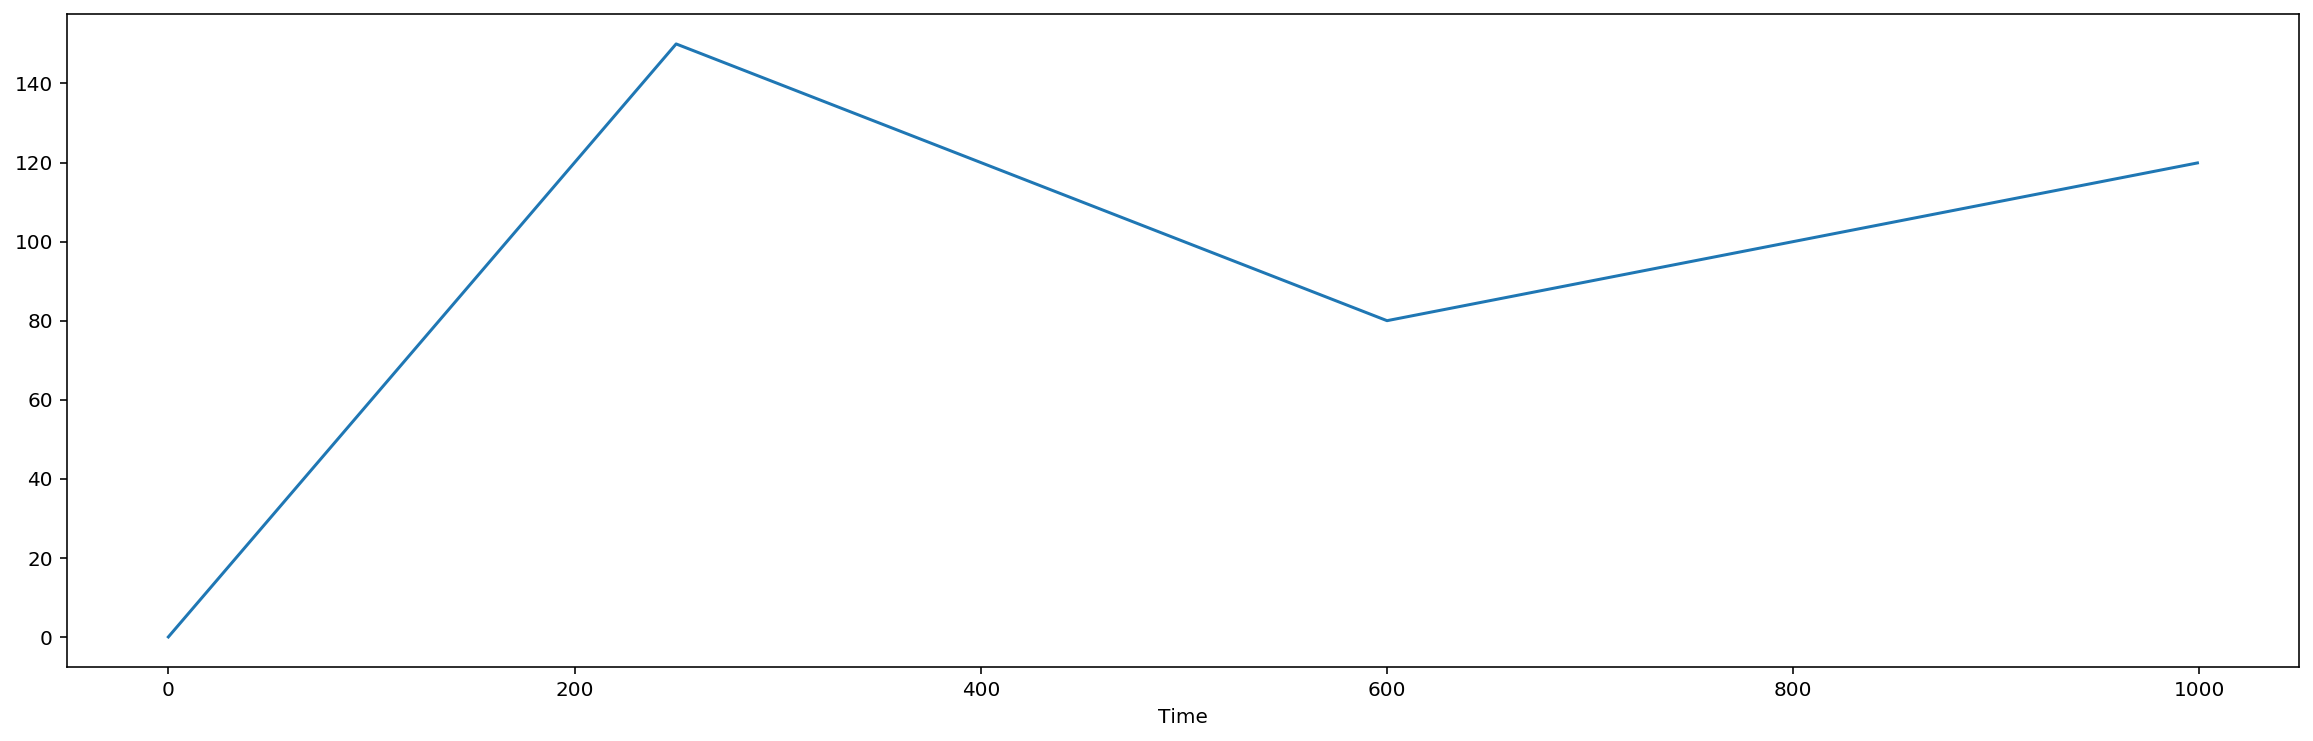

In [544]:
plt.figure(figsize=(20,6))
plt.plot(time, trend)
plt.xlabel('Time')
#plt.ylabel('measurement value')


# Seasonality

In [576]:
seasonal = 100*np.sin(time/20)+100

Text(0.5, 0, 'Time')

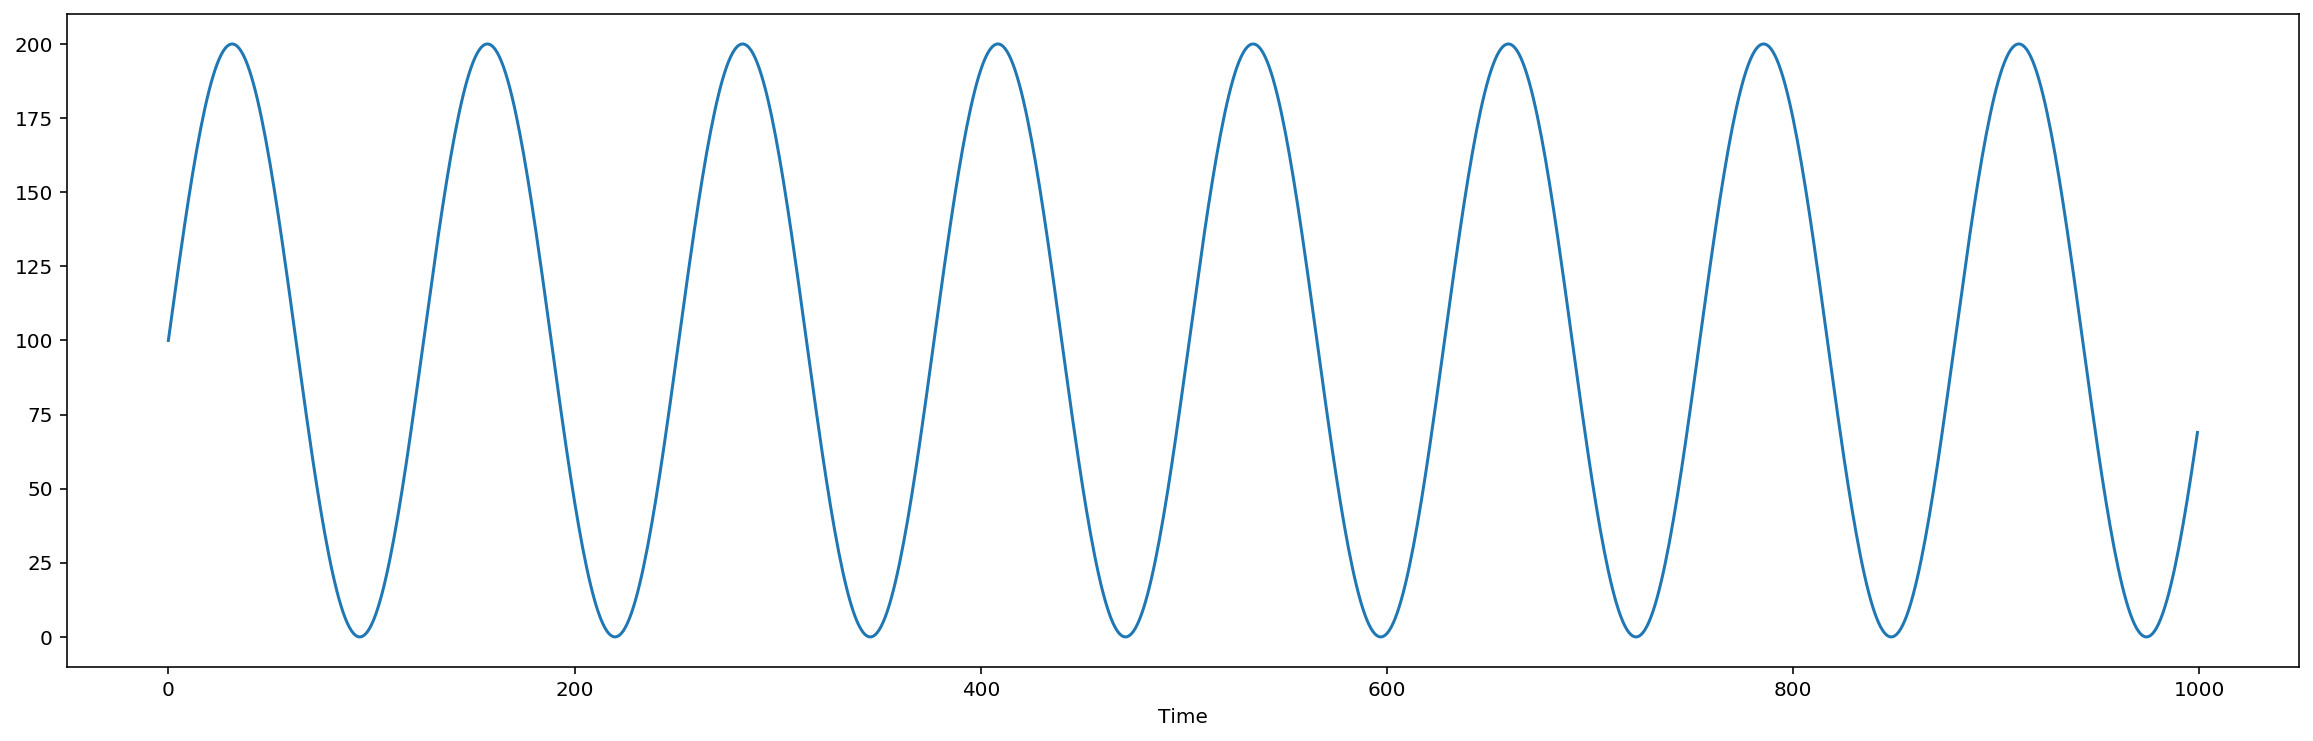

In [577]:
plt.figure(figsize=(20,6))
plt.plot(time, seasonal)
plt.xlabel('Time')
#plt.ylabel('measurement value');

Text(0.5, 0, 'Time')

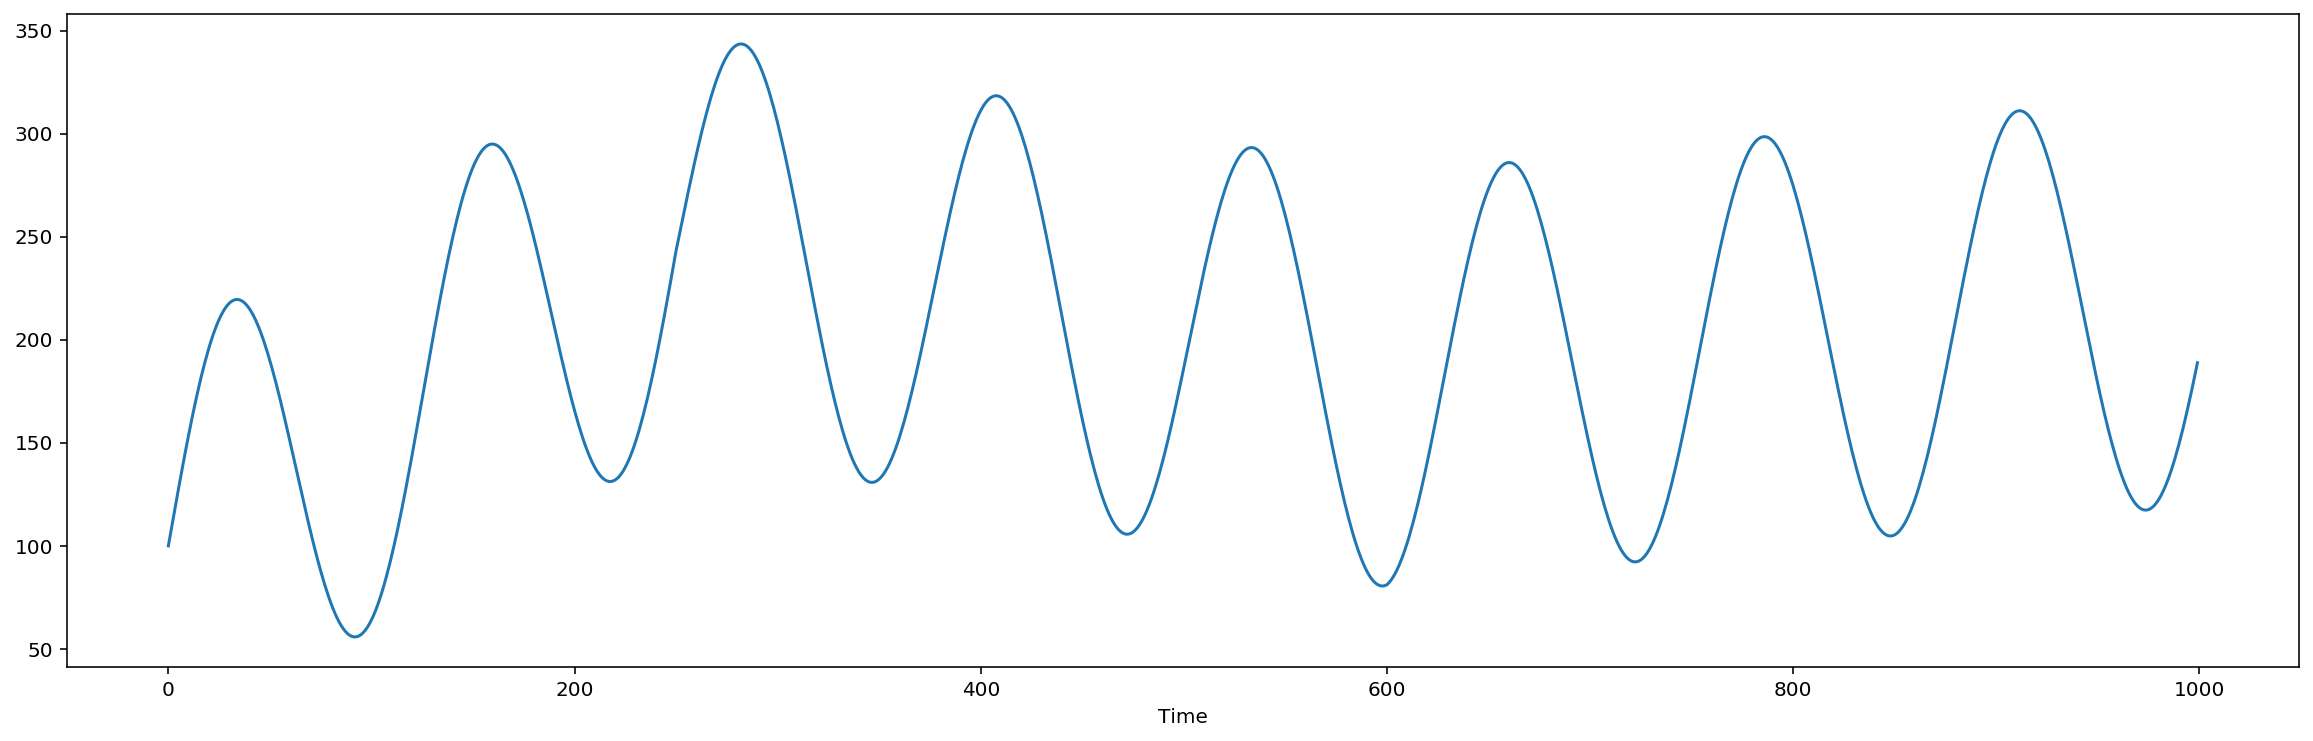

In [977]:
plt.figure(figsize=(20,6))
plt.plot(time, trend+seasonal)
plt.xlabel('Time')

# Residual

Text(0.5, 0, 'Time')

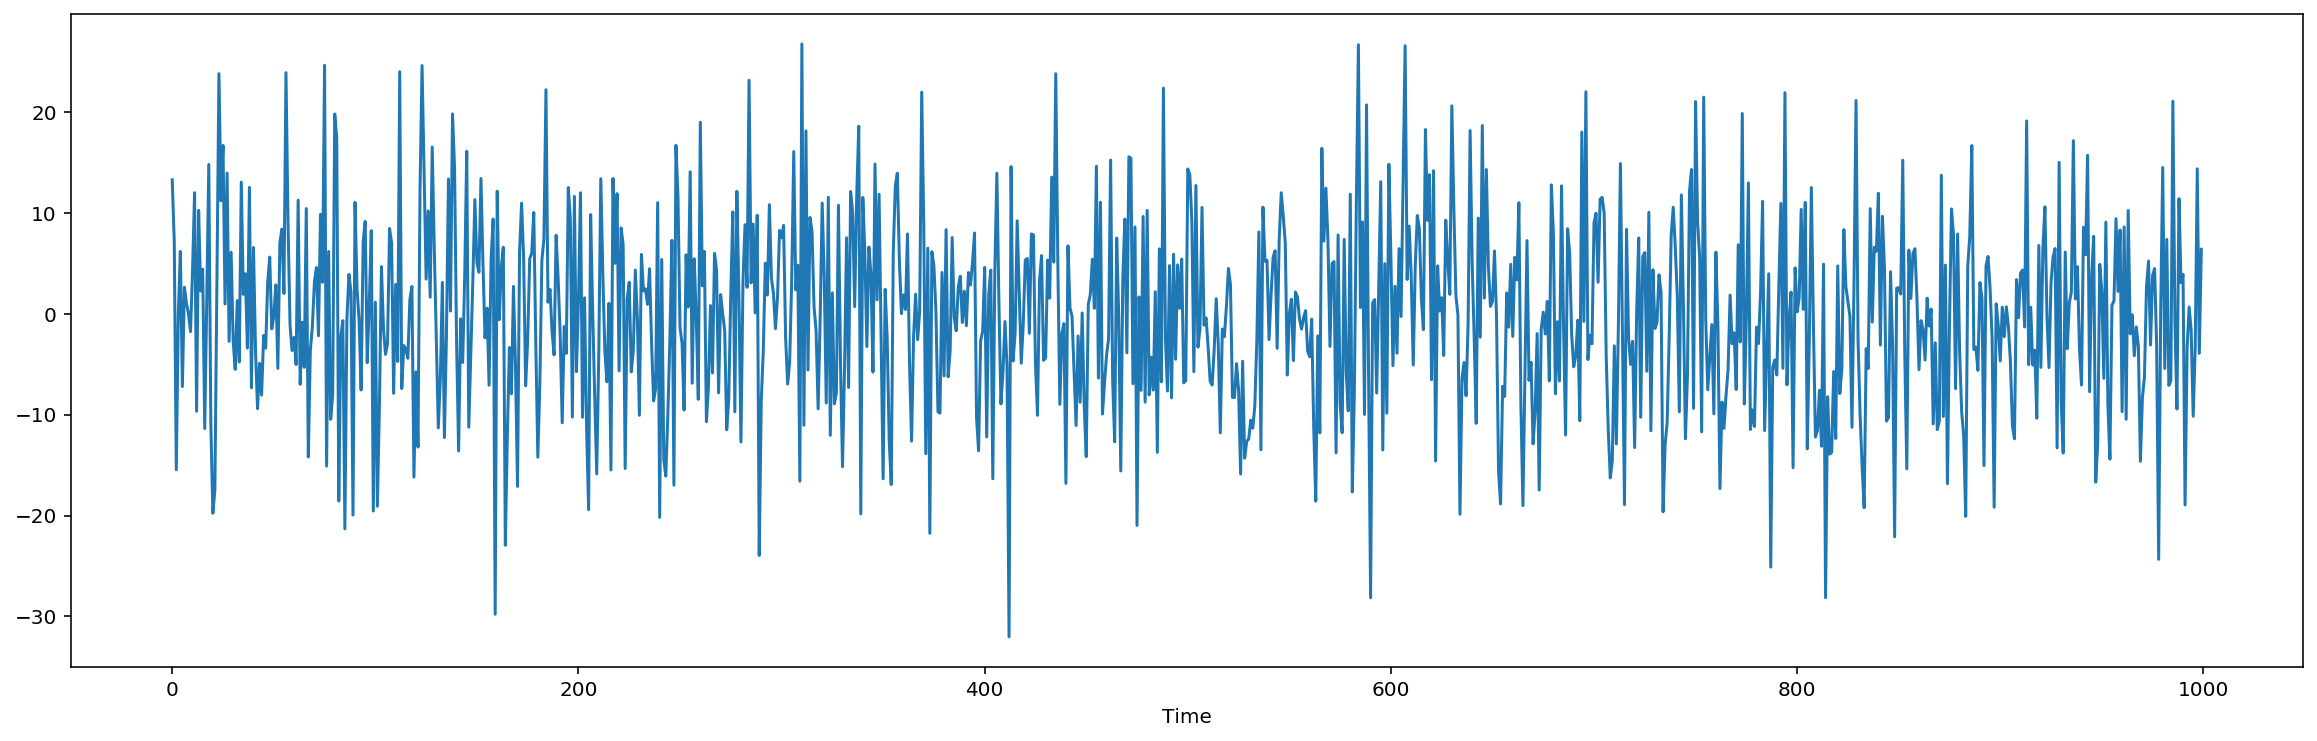

In [578]:
np.random.seed(10)
residual=10*np.random.normal(loc=0, scale=1, size=len(time))

plt.figure(figsize=(20,6))
plt.plot(time, residual)
plt.xlabel('Time')
#plt.ylabel('measurement value');

Text(0.5, 0, 'Time')

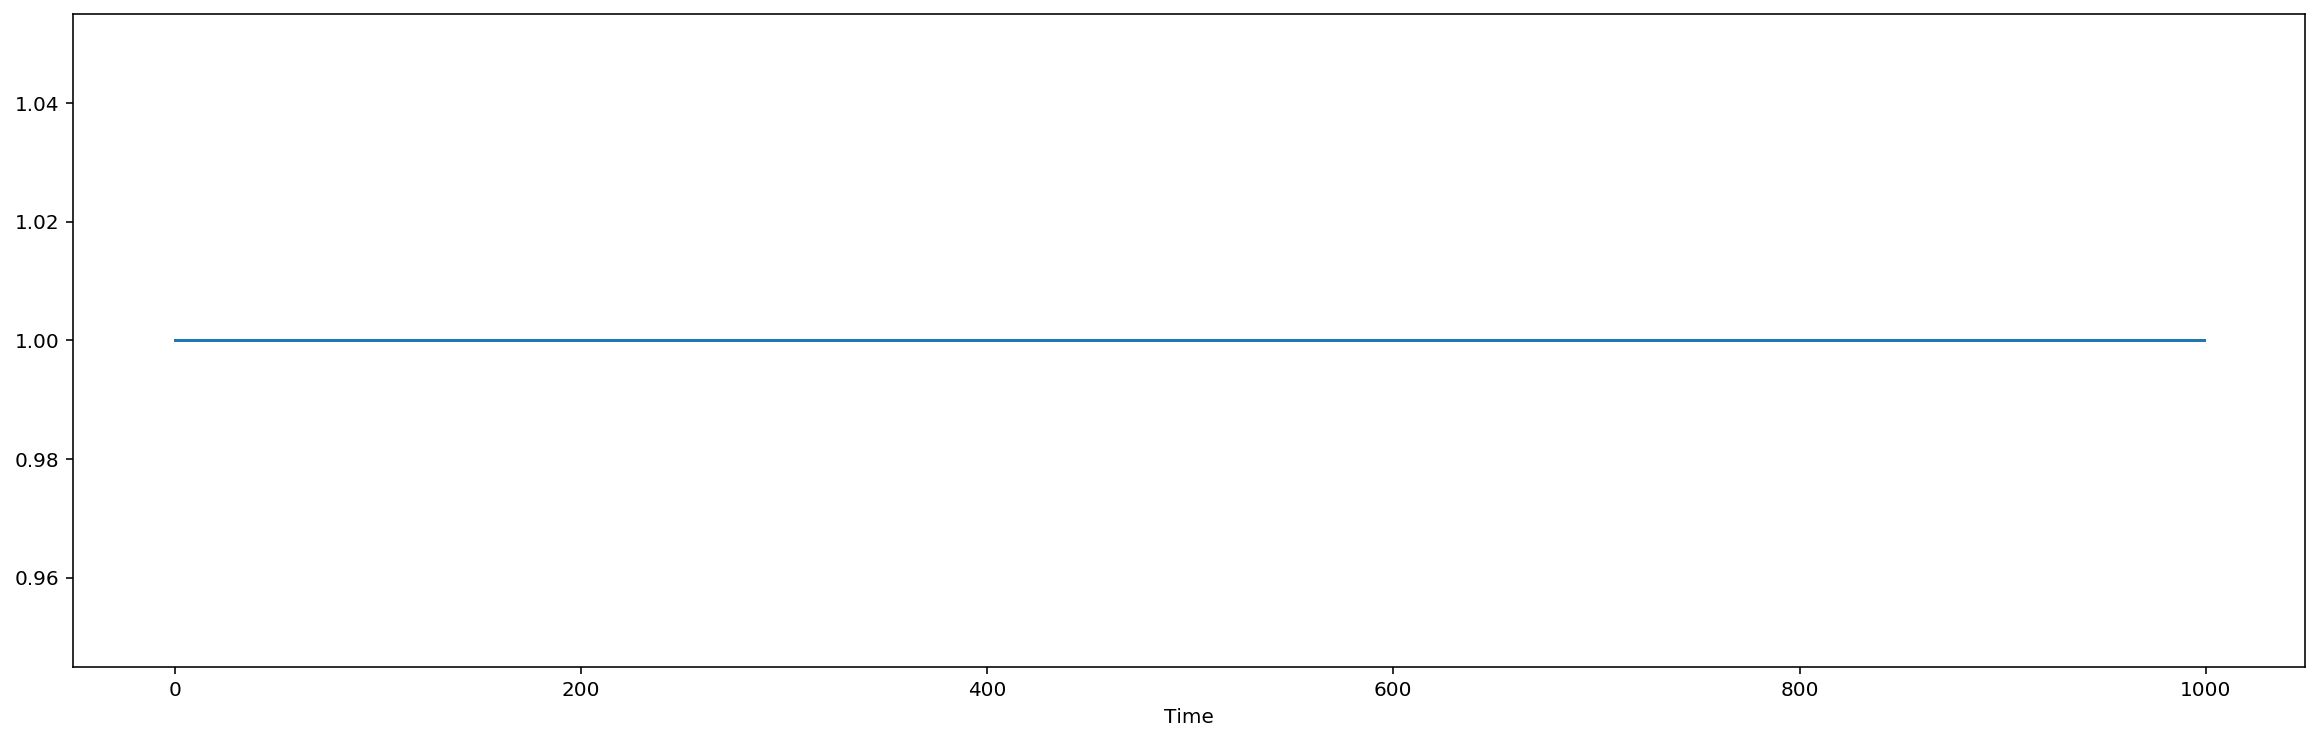

In [579]:
ignored_residual = np.ones_like(residual)
plt.figure(figsize=(20,6))
plt.plot(time, ignored_residual)
plt.xlabel('Time')

In [580]:
additive = trend + seasonal +residual

# multiplicative =(100+ trend )* seasonal *ignored_residual
multiplicative =(100+ trend )* seasonal *residual

Text(0.5, 0, 'Time')

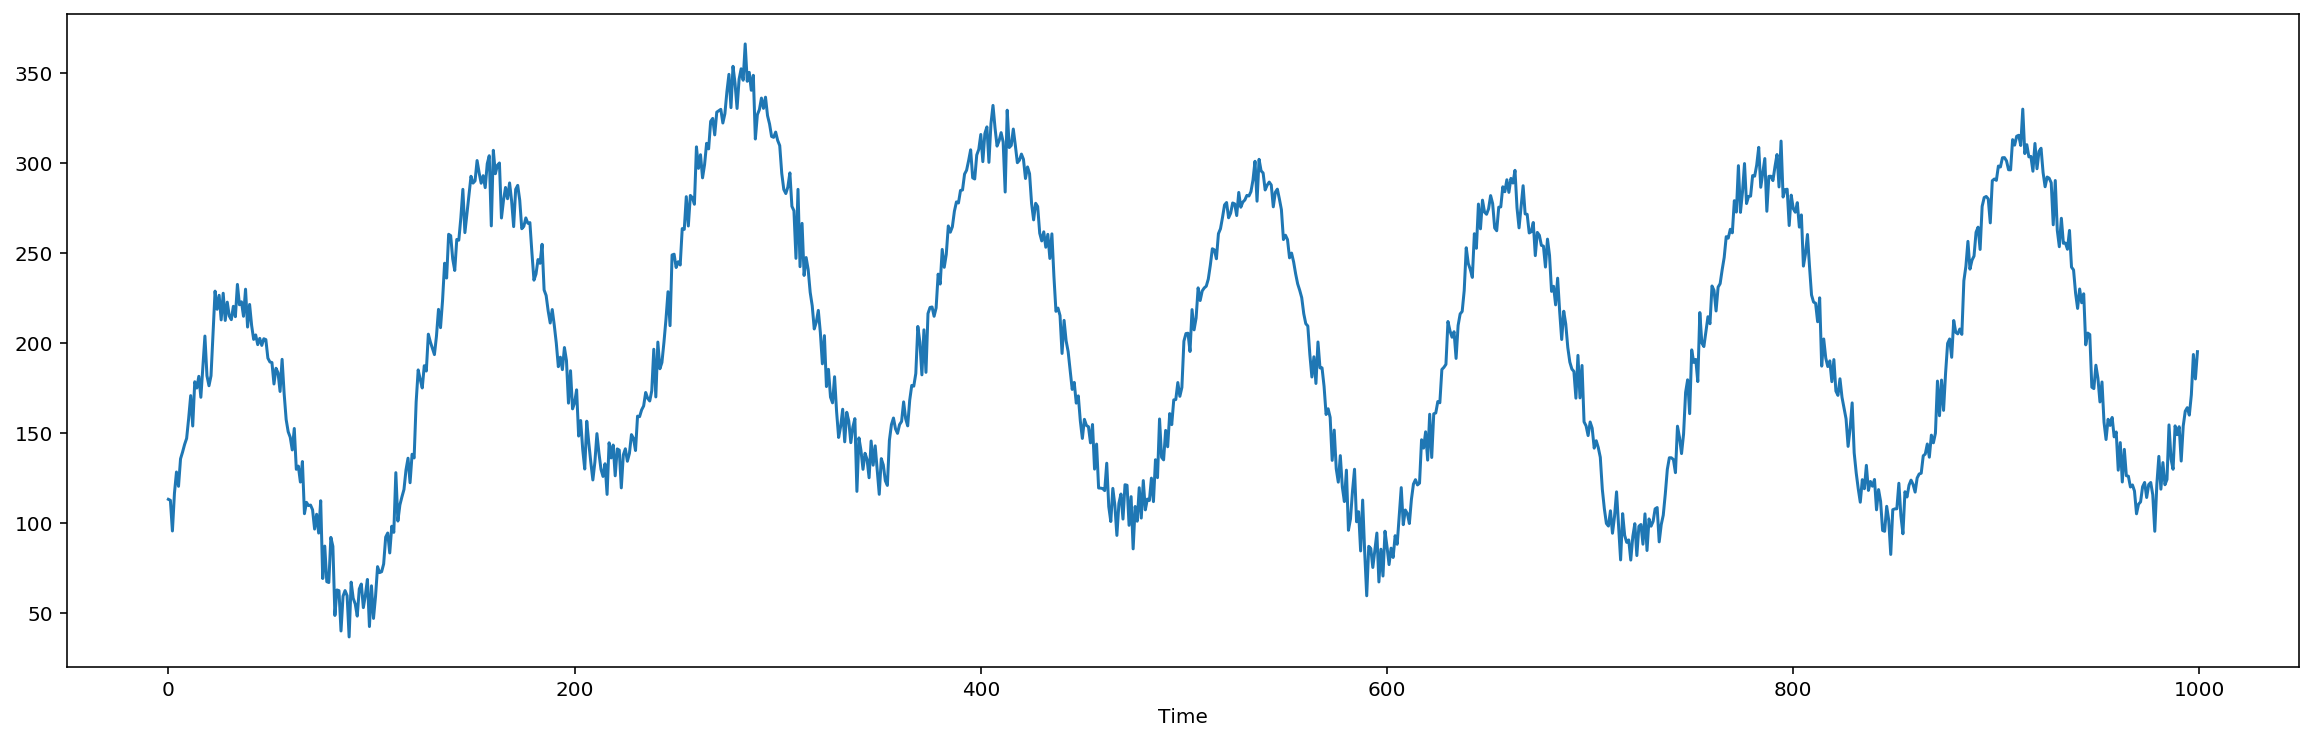

In [581]:
plt.figure(figsize=(20,6))
plt.plot(time, additive)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

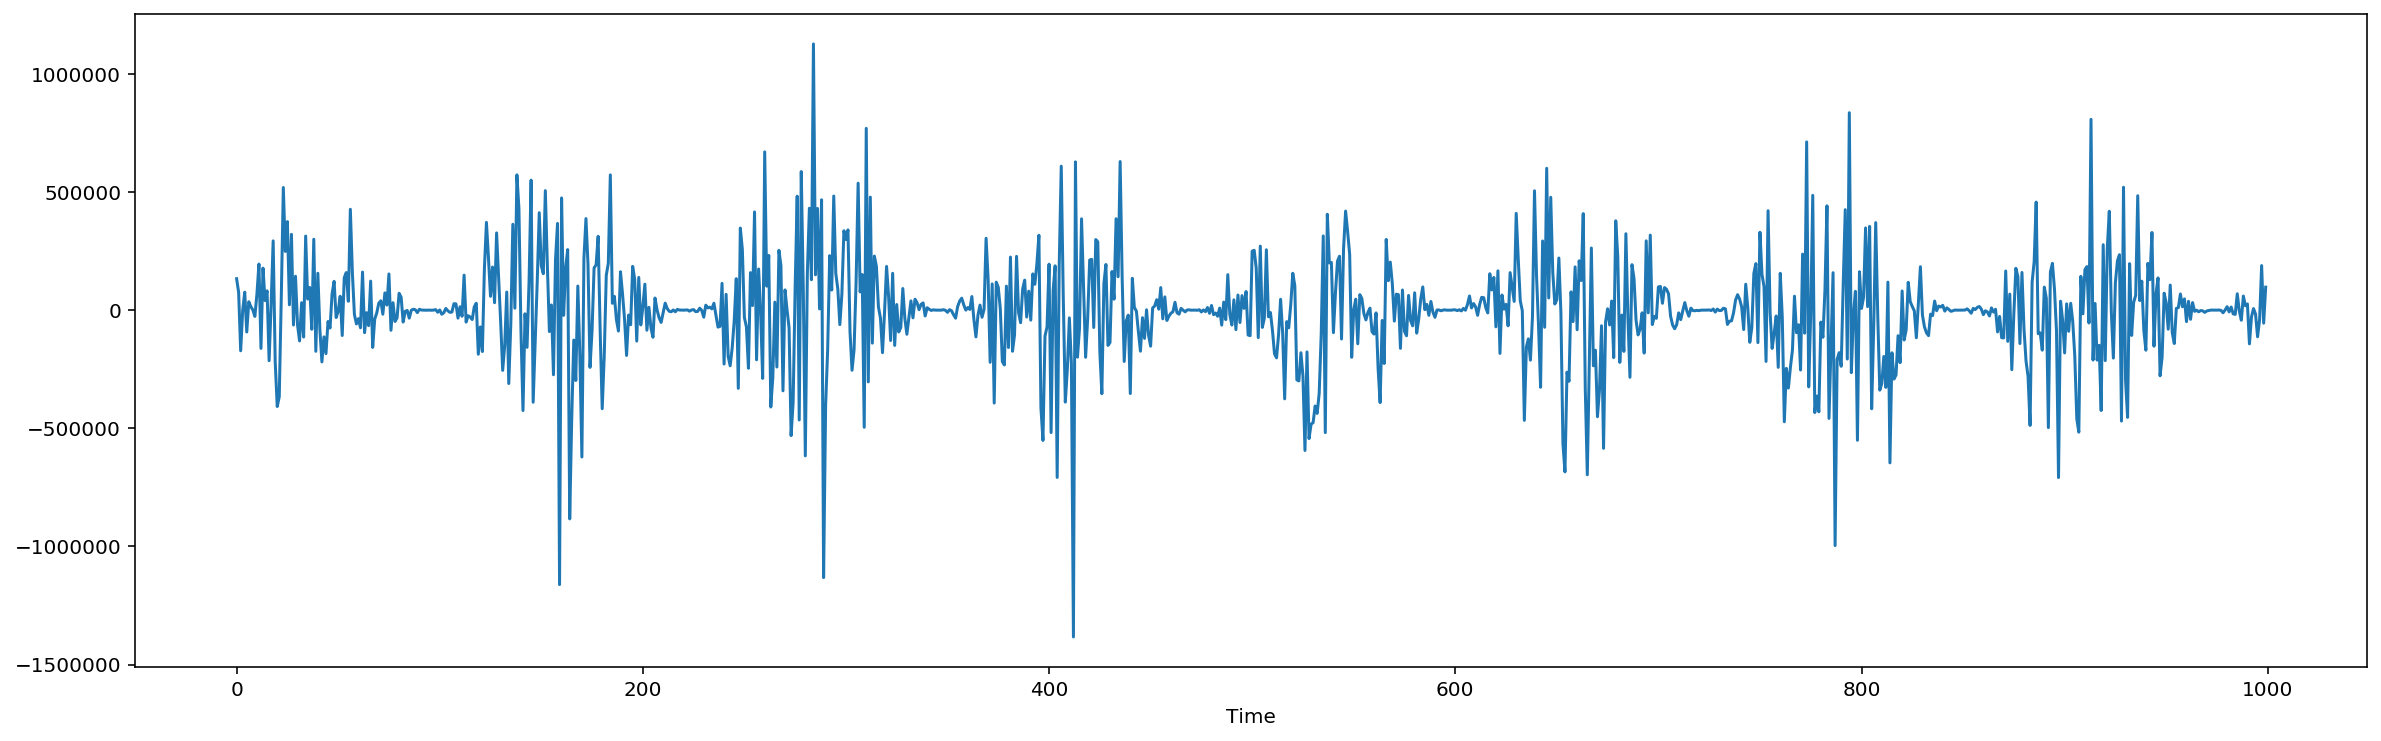

In [582]:
plt.figure(figsize=(20,6))
plt.plot(time, multiplicative)
plt.xlabel('Time')

In [583]:
DFT = np.fft.fft(additive)
real_DFT=DFT.real

Text(0.5, 0, 'Time')

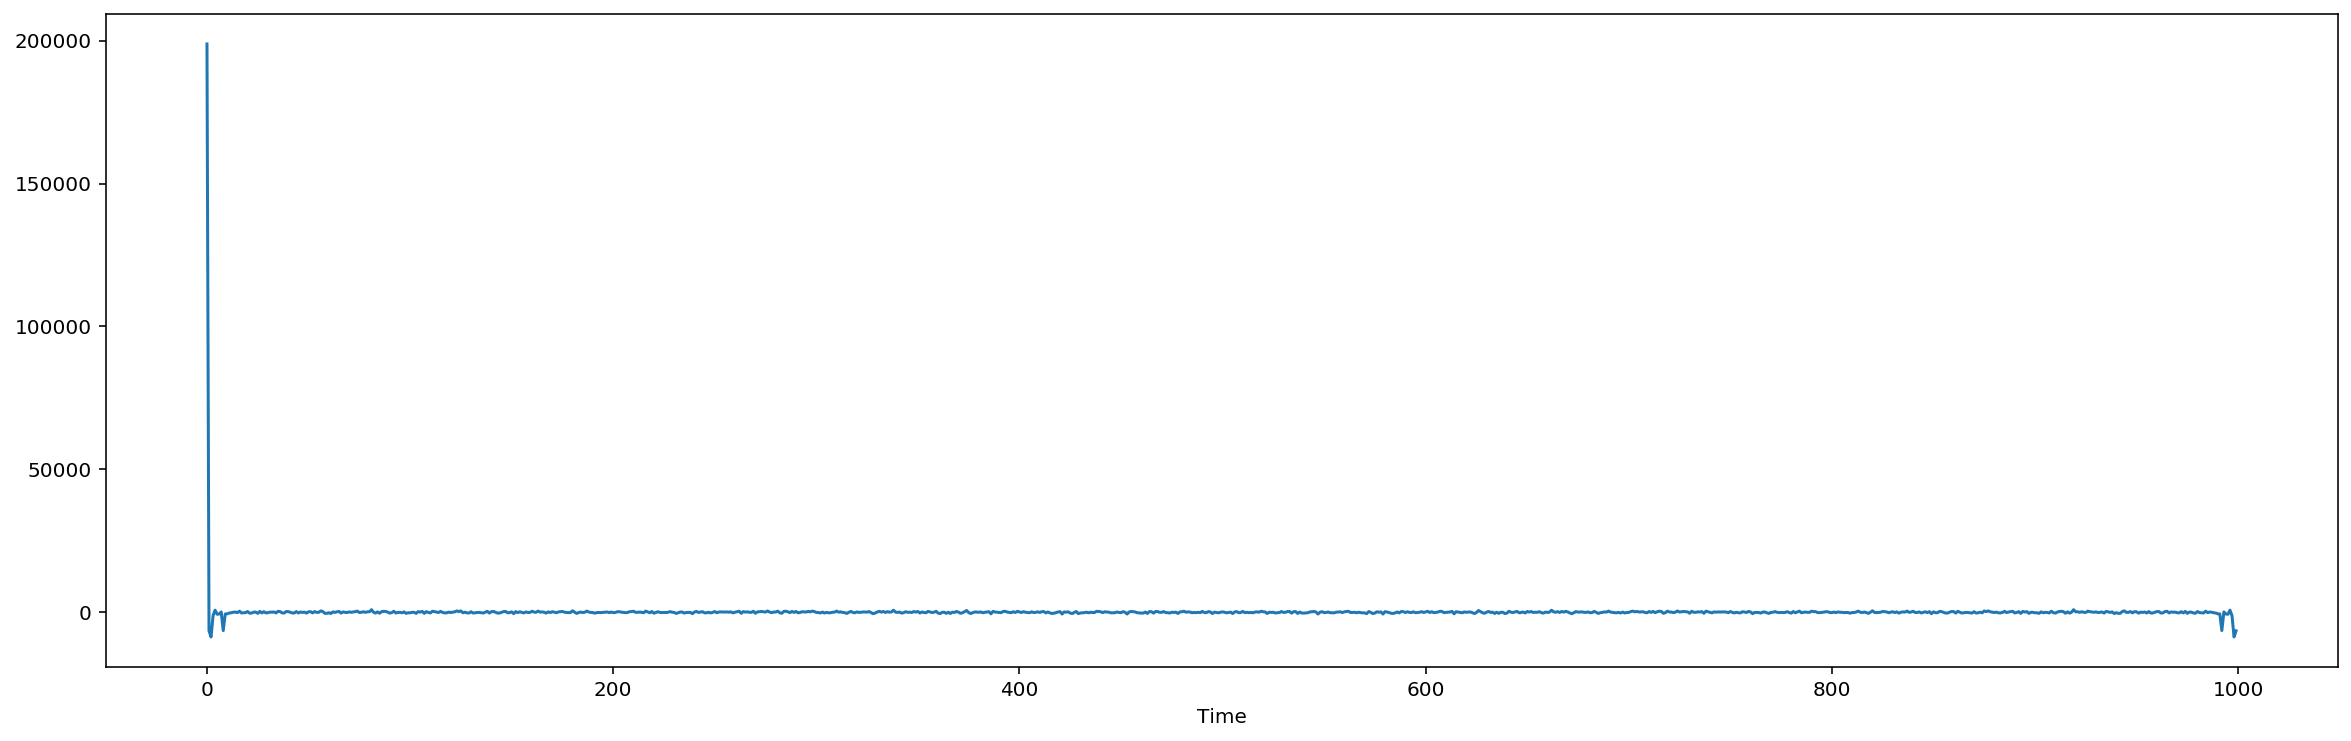

In [584]:
plt.figure(figsize=(20,6))
plt.plot(time, real_DFT)
plt.xlabel('Time')

In [509]:
max_DFT = np.amax(real_DFT)
print(max_DFT)

# for i in (time):
#     if 
#     print(i)

190423.04544780706


In [294]:
type(max_DFT)
ggh

numpy.float64

ValueError: x and y must have same first dimension, but have shapes (1,) and (500,)

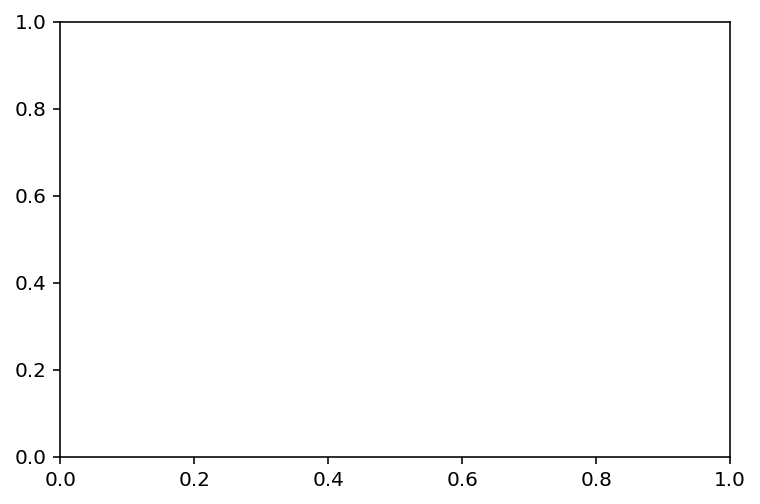

In [289]:
import scipy.fftpack

yfft = scipy.fftpack.fft(multiplicative)
fig, ax = plt.subplots()

ax.plot(len(time), 2.0/len(time) * np.abs(yfft[:len(time)//2]))
plt.show()

# Decomposition

In [486]:
from statsmodels.tsa.seasonal import seasonal_decompose

mul_decomp = seasonal_decompose(x=multiplicative, model='multiplicative',period=590)


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

Text(0.5, 0, 'Time')

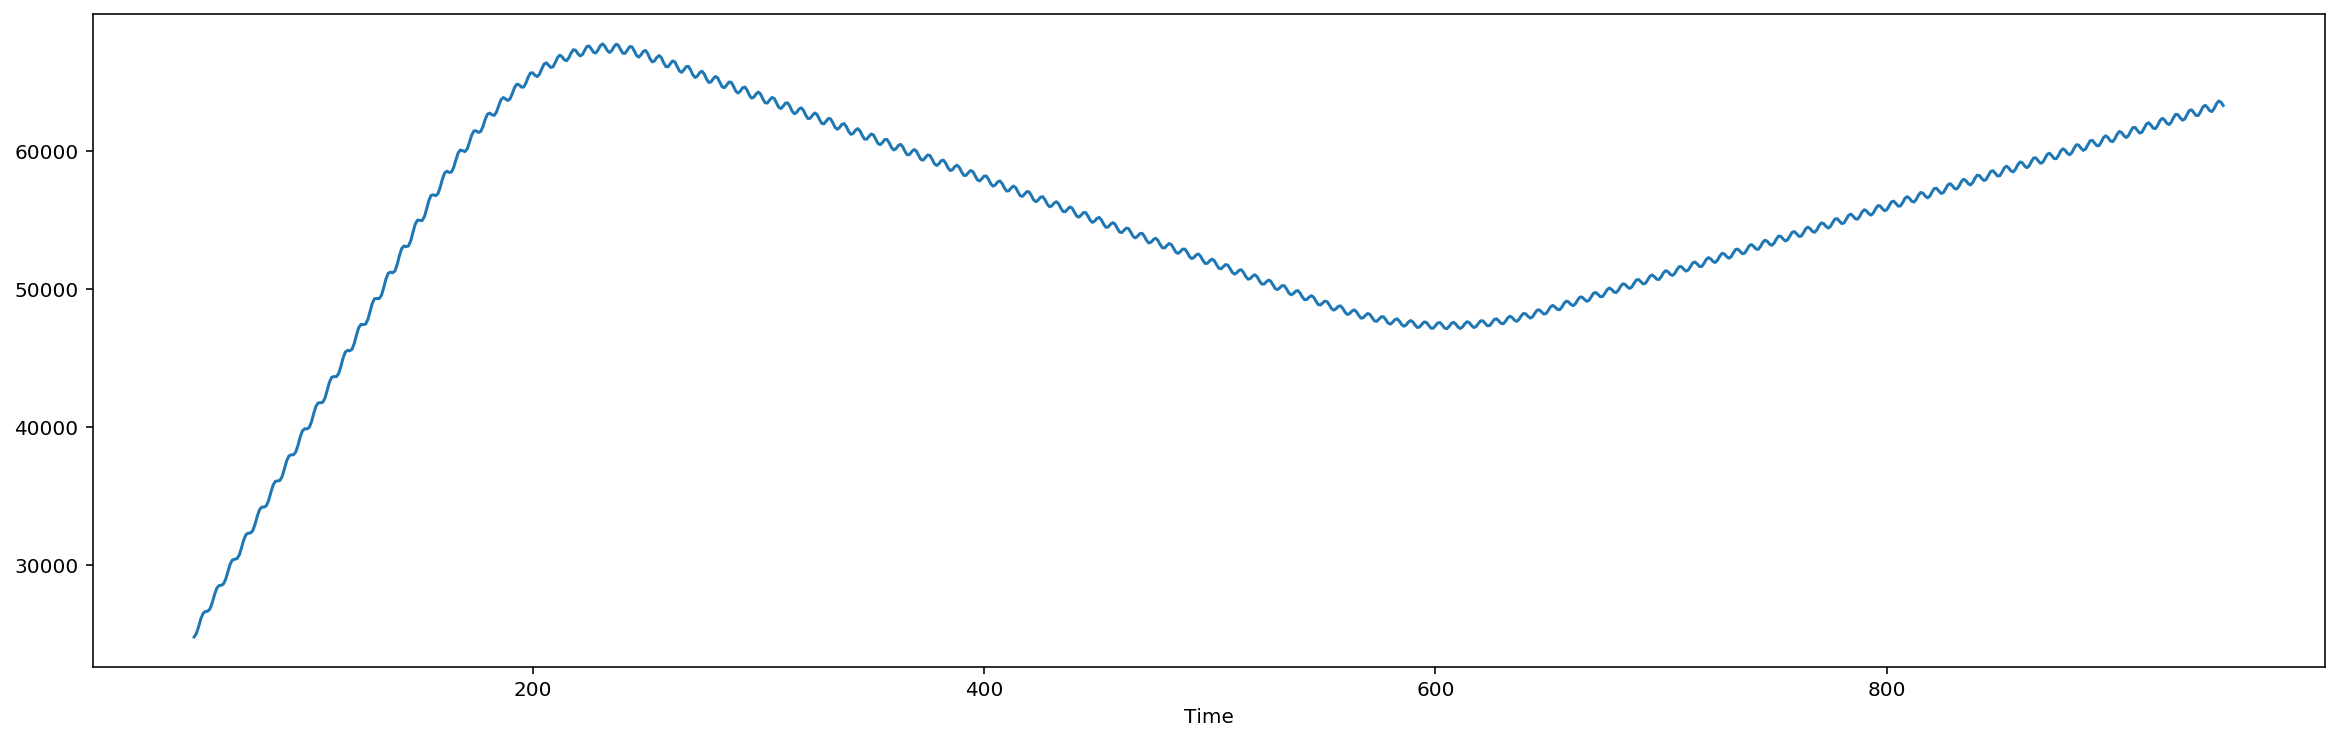

In [585]:
plt.figure(figsize=(20,6))
plt.plot(time,mul_decomp.trend)
plt.xlabel('Time')

In [491]:
plt.figure(figsize=(20,6))
plt.plot(time,mul_decomp.seasomal)
plt.xlabel('Time')

AttributeError: 'DecomposeResult' object has no attribute 'seasomal'

<Figure size 1440x432 with 0 Axes>

In [ ]:
plt.plot(time,add_decomp.trend)
plt.xlabel('Time')

In [586]:
add_decomp = seasonal_decompose(x=additive, model='additive',period=120)
estimate_trand = add_decomp.trend



Text(0.5, 0, 'Time')

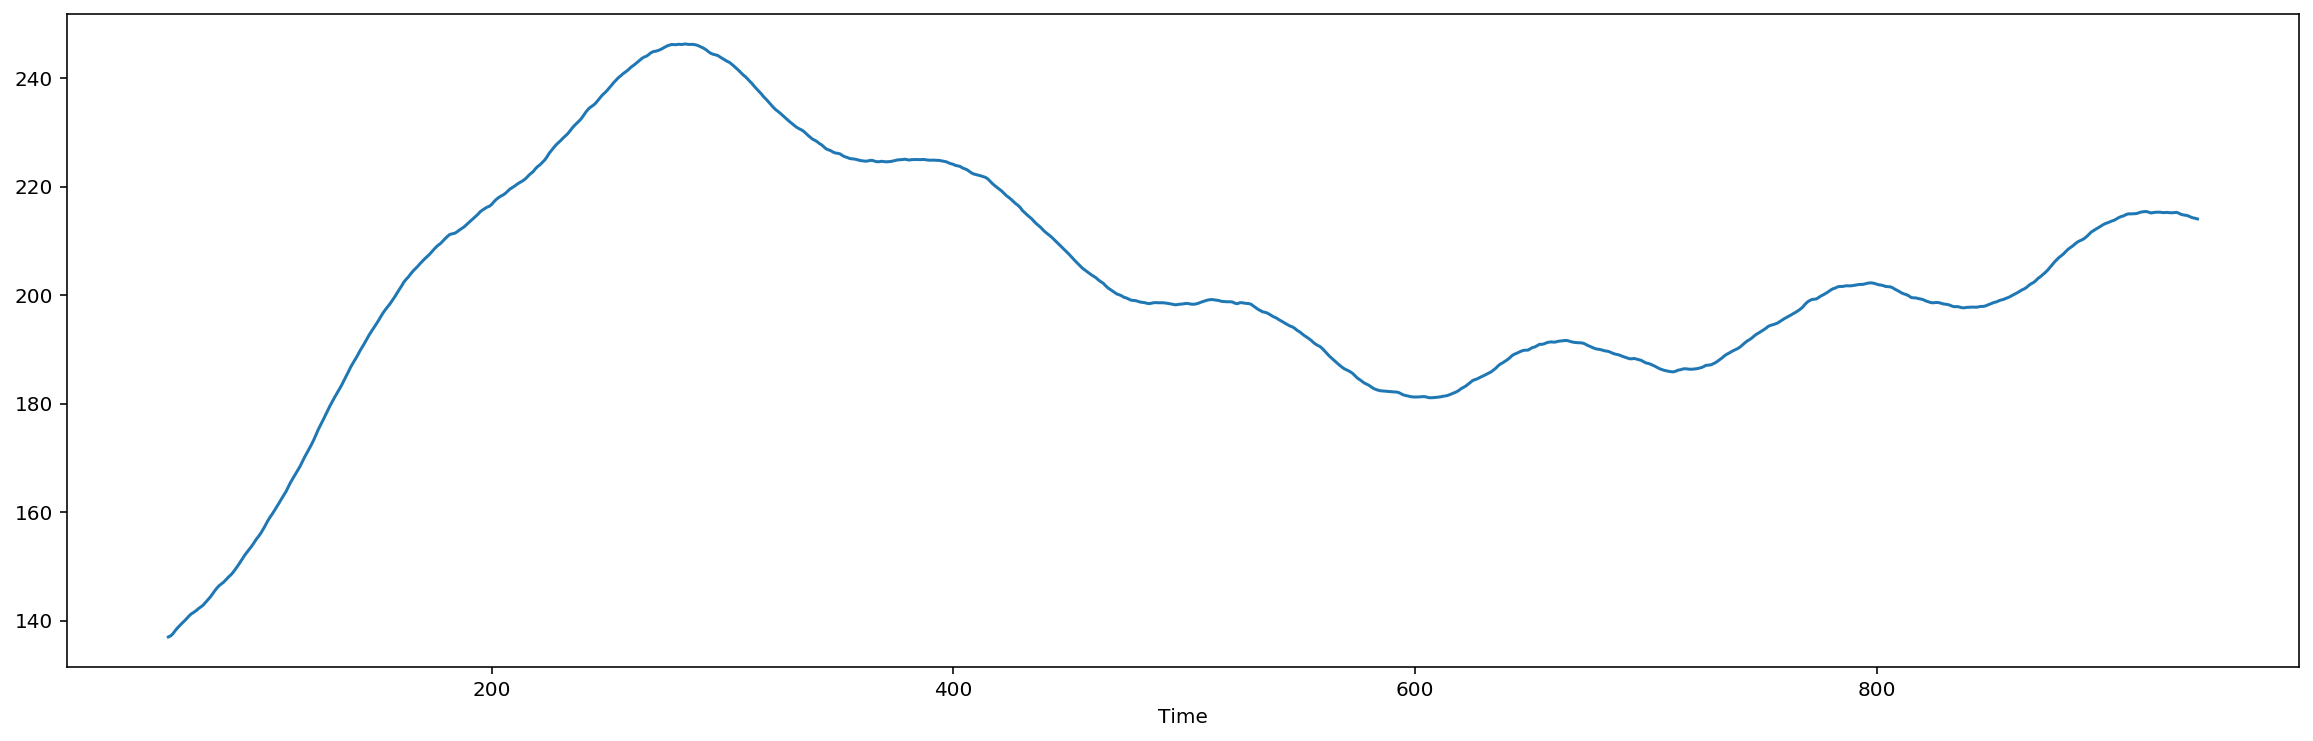

In [587]:
plt.figure(figsize=(20,6))
plt.plot(time,add_decomp.trend)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

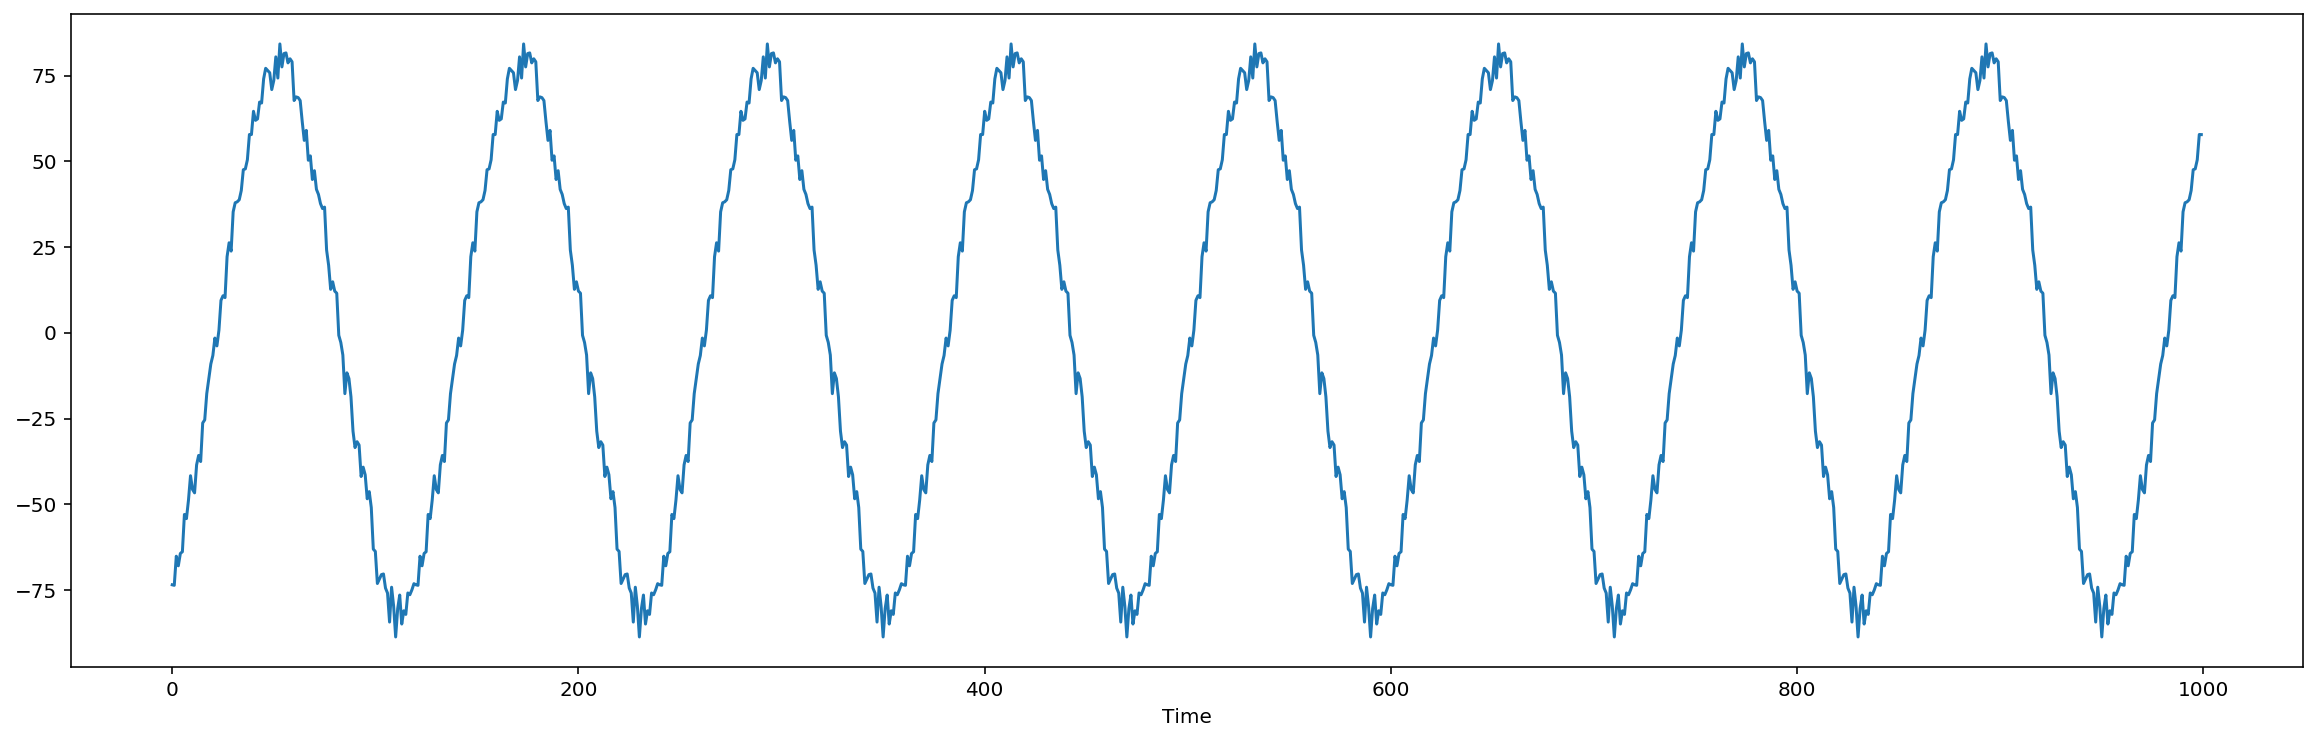

In [588]:
plt.figure(figsize=(20,6))
plt.plot(time, add_decomp.seasonal)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

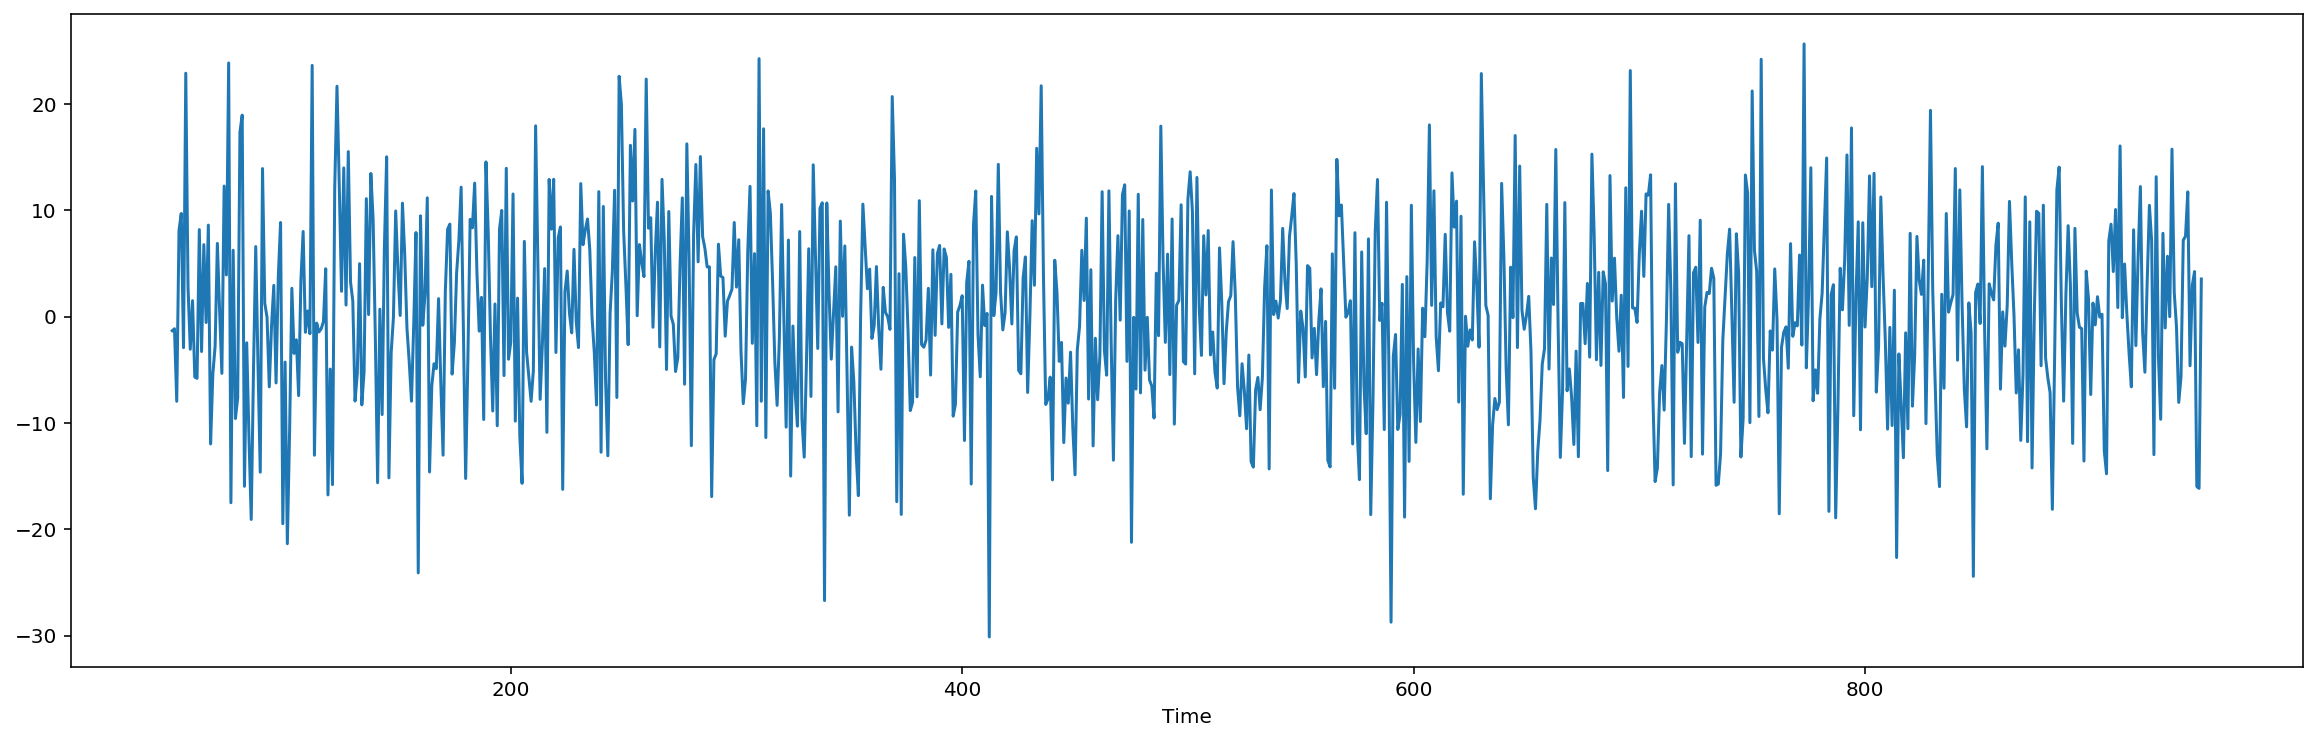

In [572]:
plt.figure(figsize=(20,6))
plt.plot(time, add_decomp.resid)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

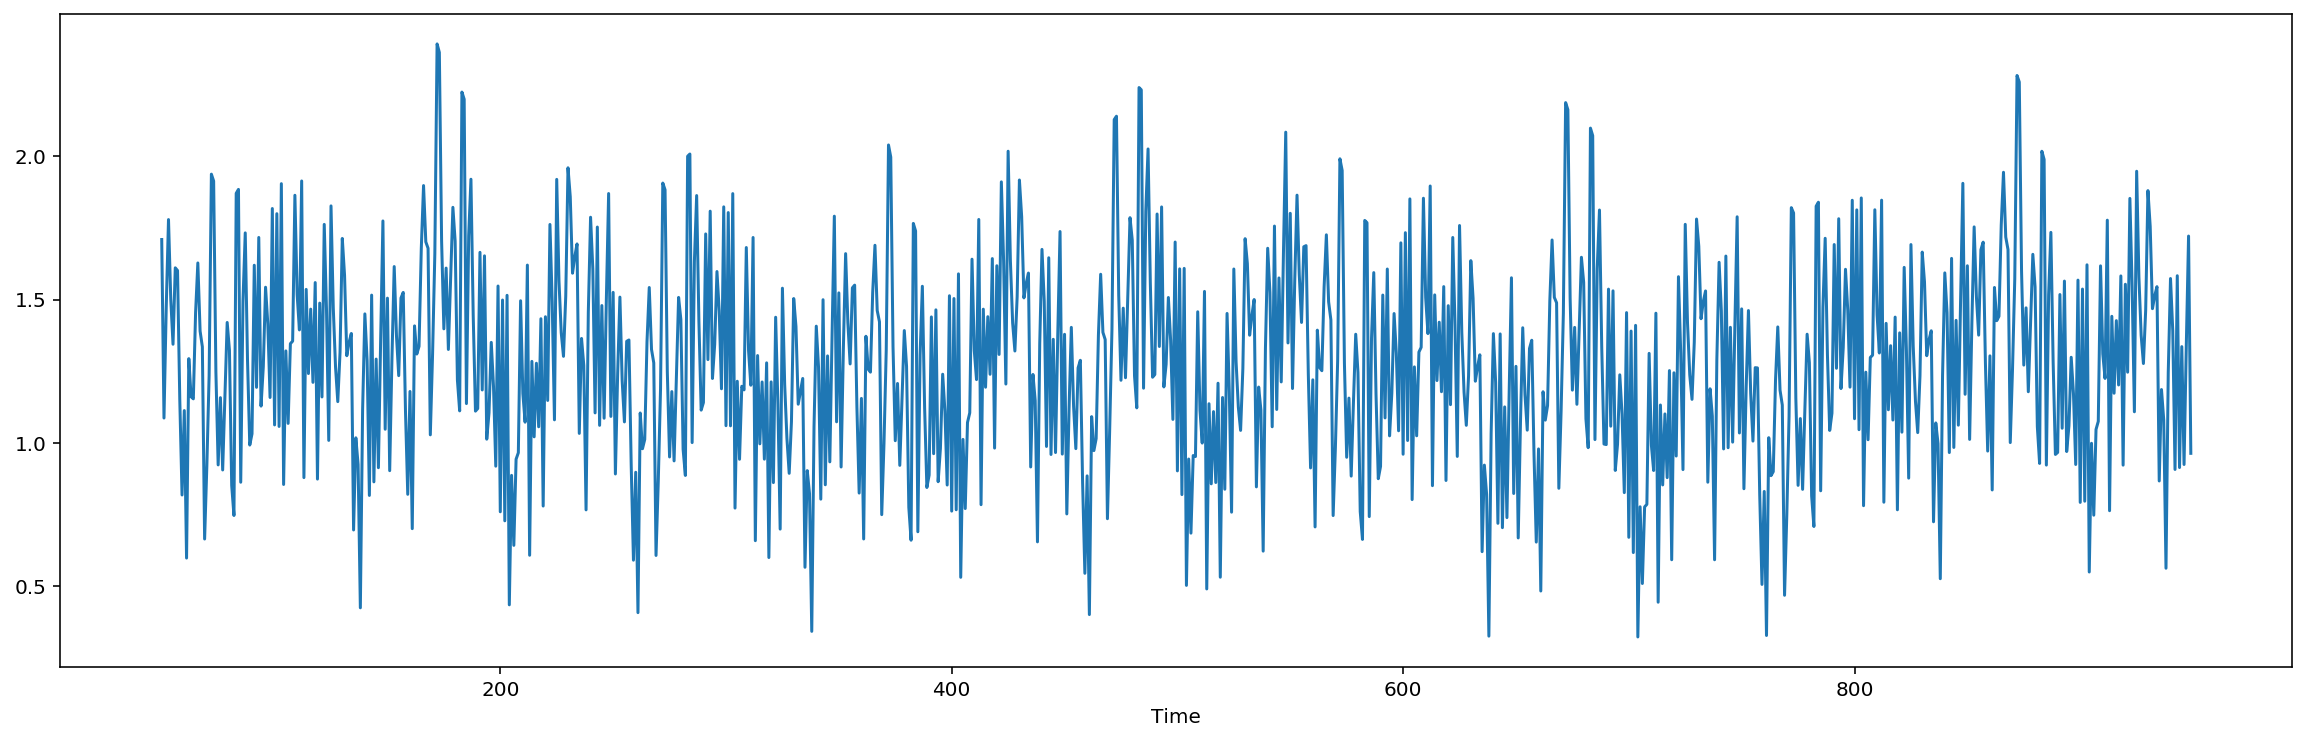

In [978]:
plt.figure(figsize=(20,6))
plt.plot(time, add_decomp.trend+add_decomp.seasonal)
plt.xlabel('Time')

In [919]:
trend2=np.empty_like(time, dtype='float')
for tt in time:
    trend2[tt] = .003*tt + 230

Text(0.5, 0, 'Time')

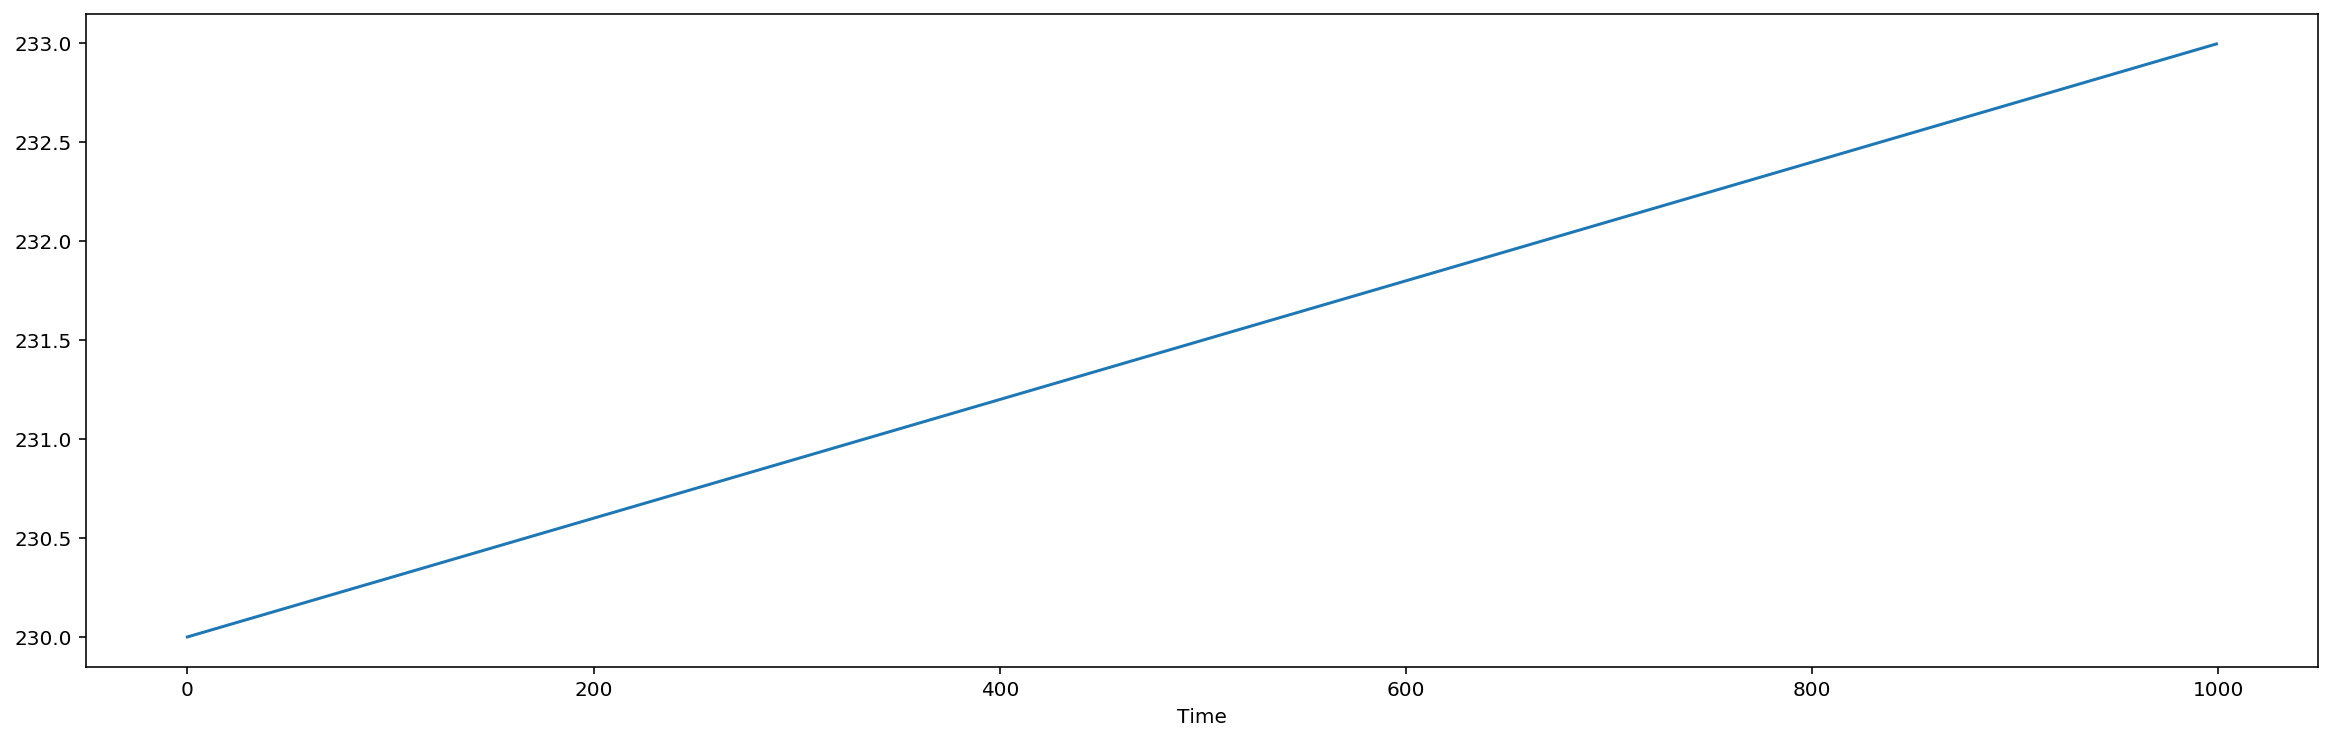

In [920]:
plt.figure(figsize=(20,6))
plt.plot(time,trend2)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

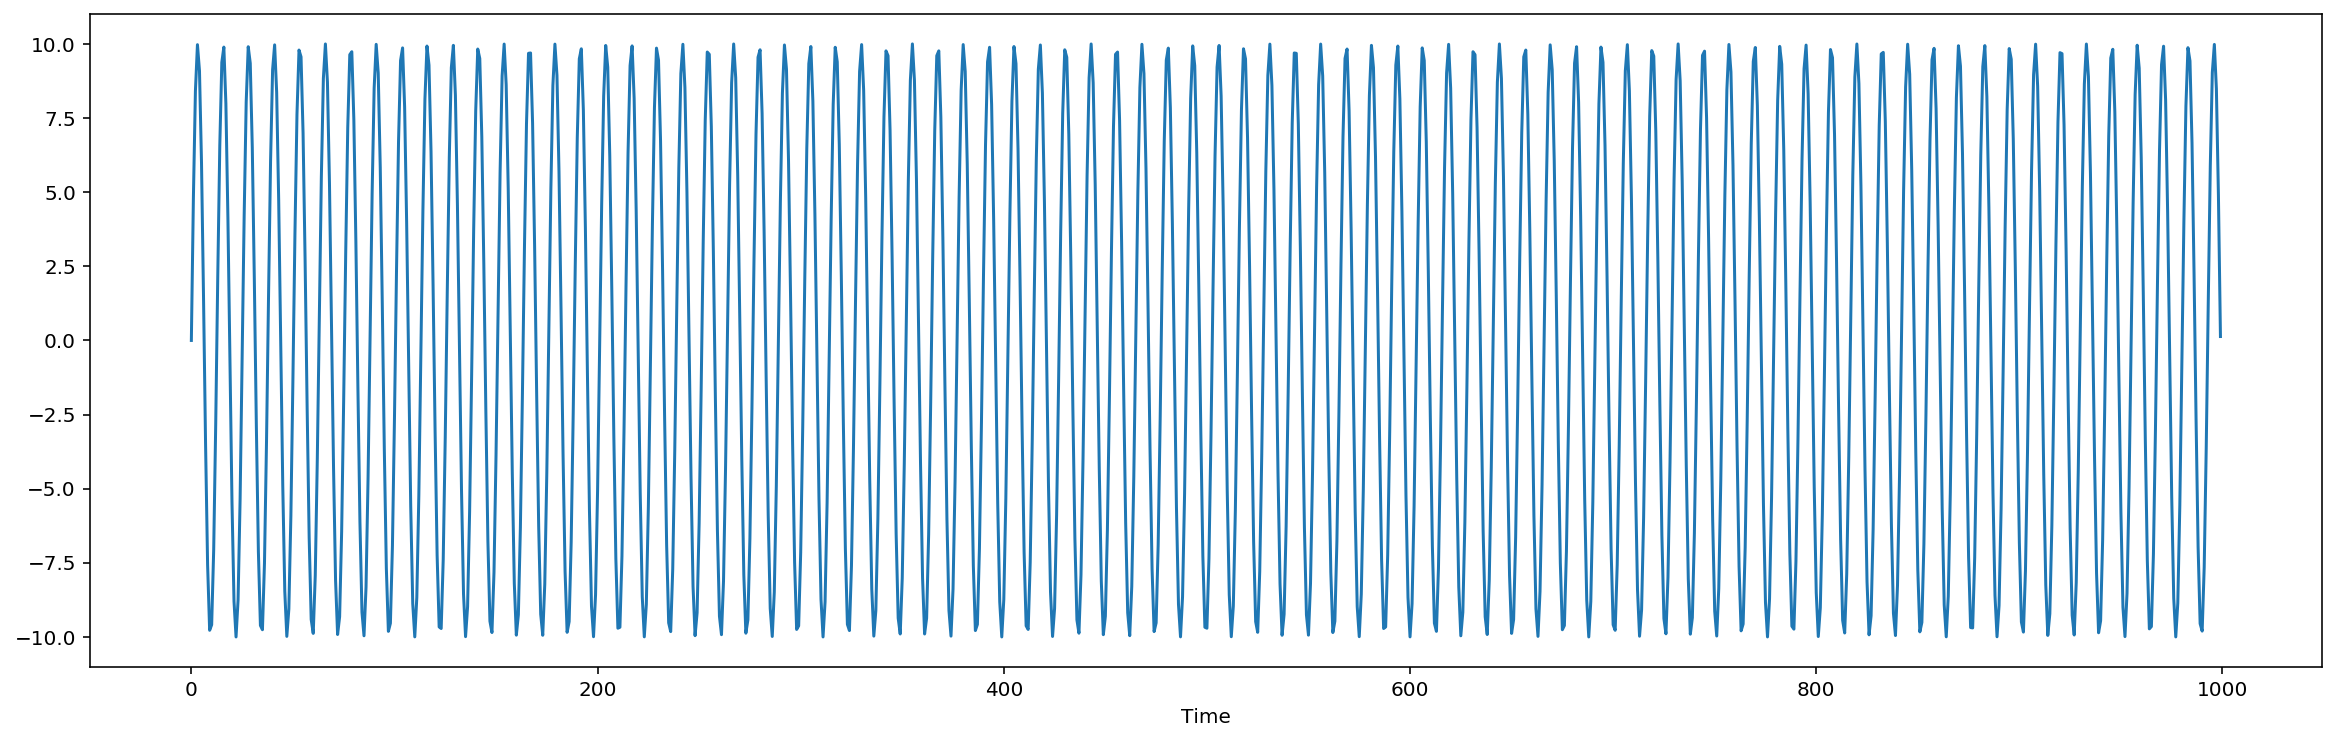

In [921]:
seasonal2= 10*np.sin(time/2)
plt.figure(figsize=(20,6))
plt.plot(time, seasonal2)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

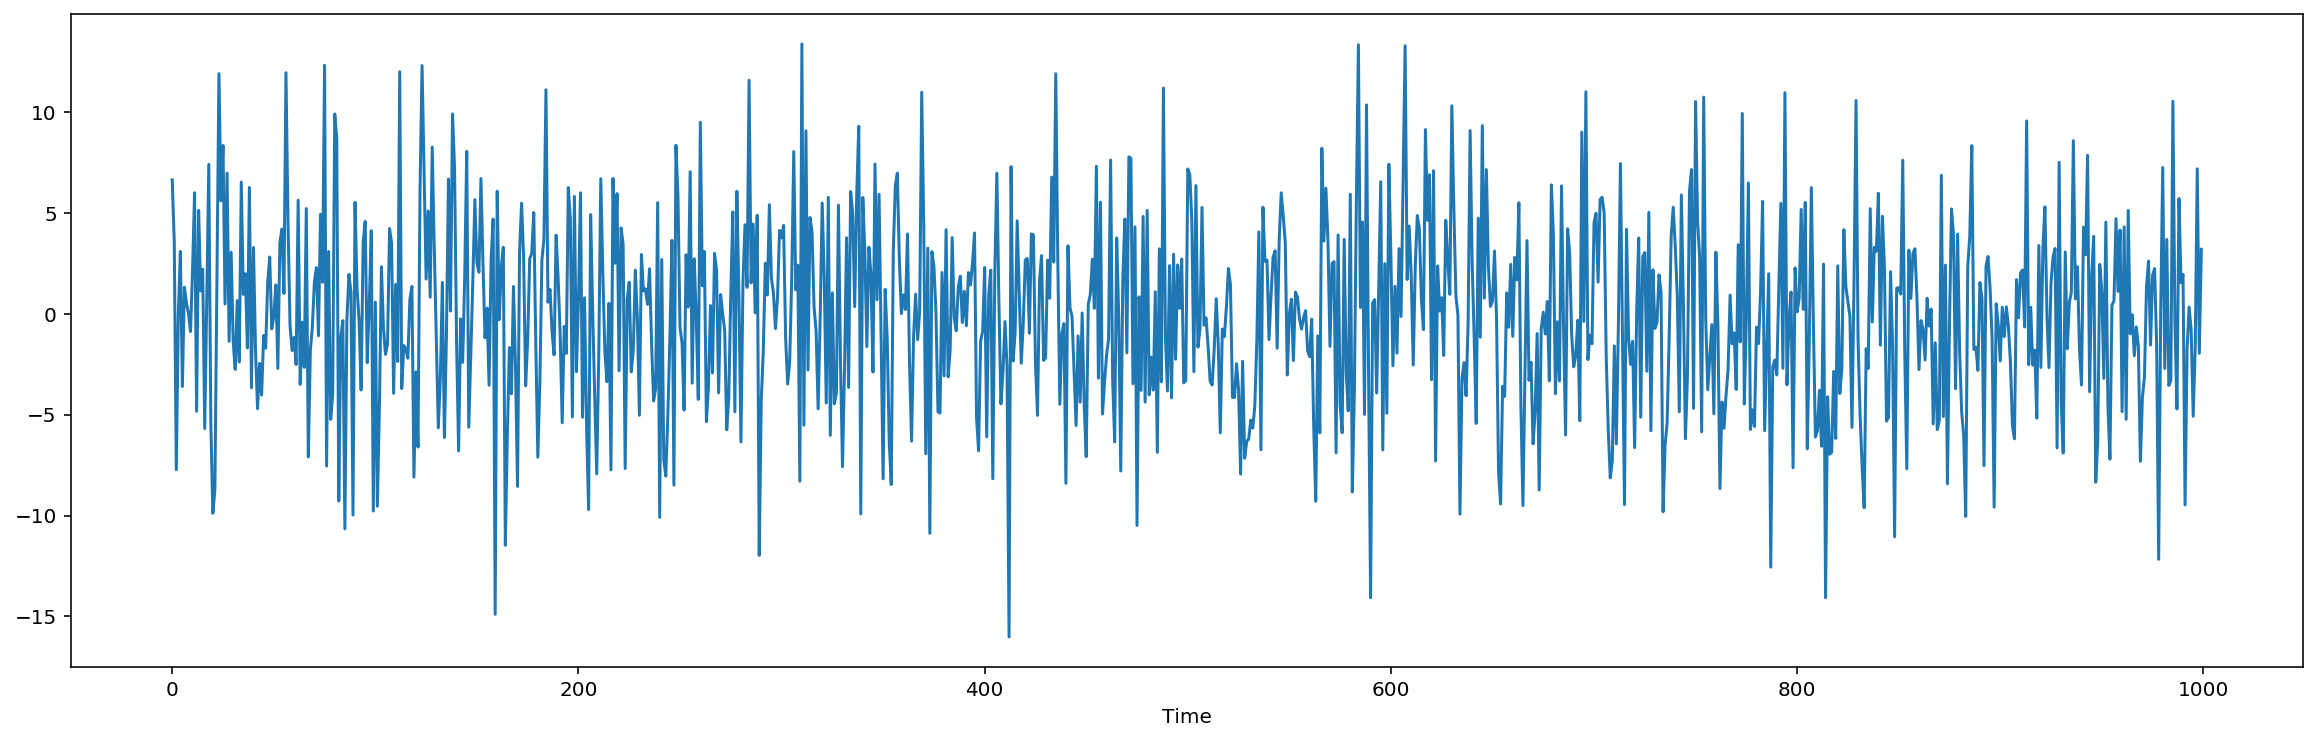

In [986]:
np.random.seed(10)
residual2=5*np.random.normal(loc=0, scale=1, size=len(time))

plt.figure(figsize=(20,6))
plt.plot(time, residual2)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

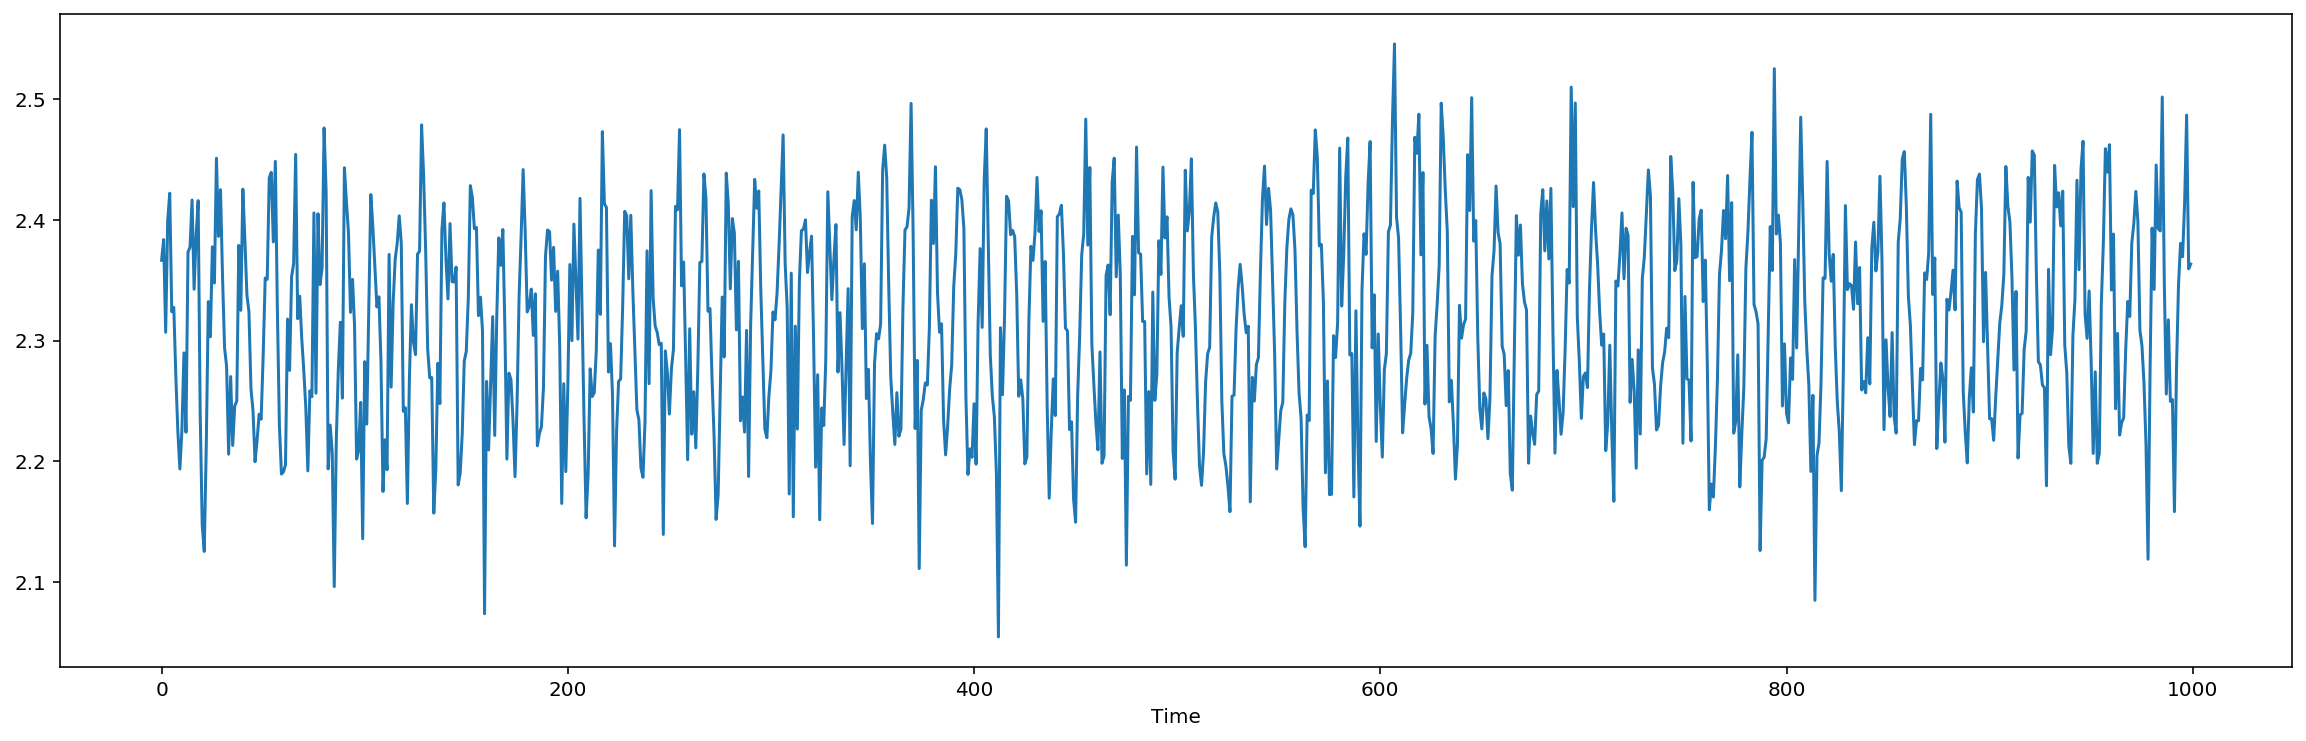

In [987]:
rr =.01*( trend2+seasonal2+residual2)
plt.figure(figsize=(20,6))
plt.plot(time, rr)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

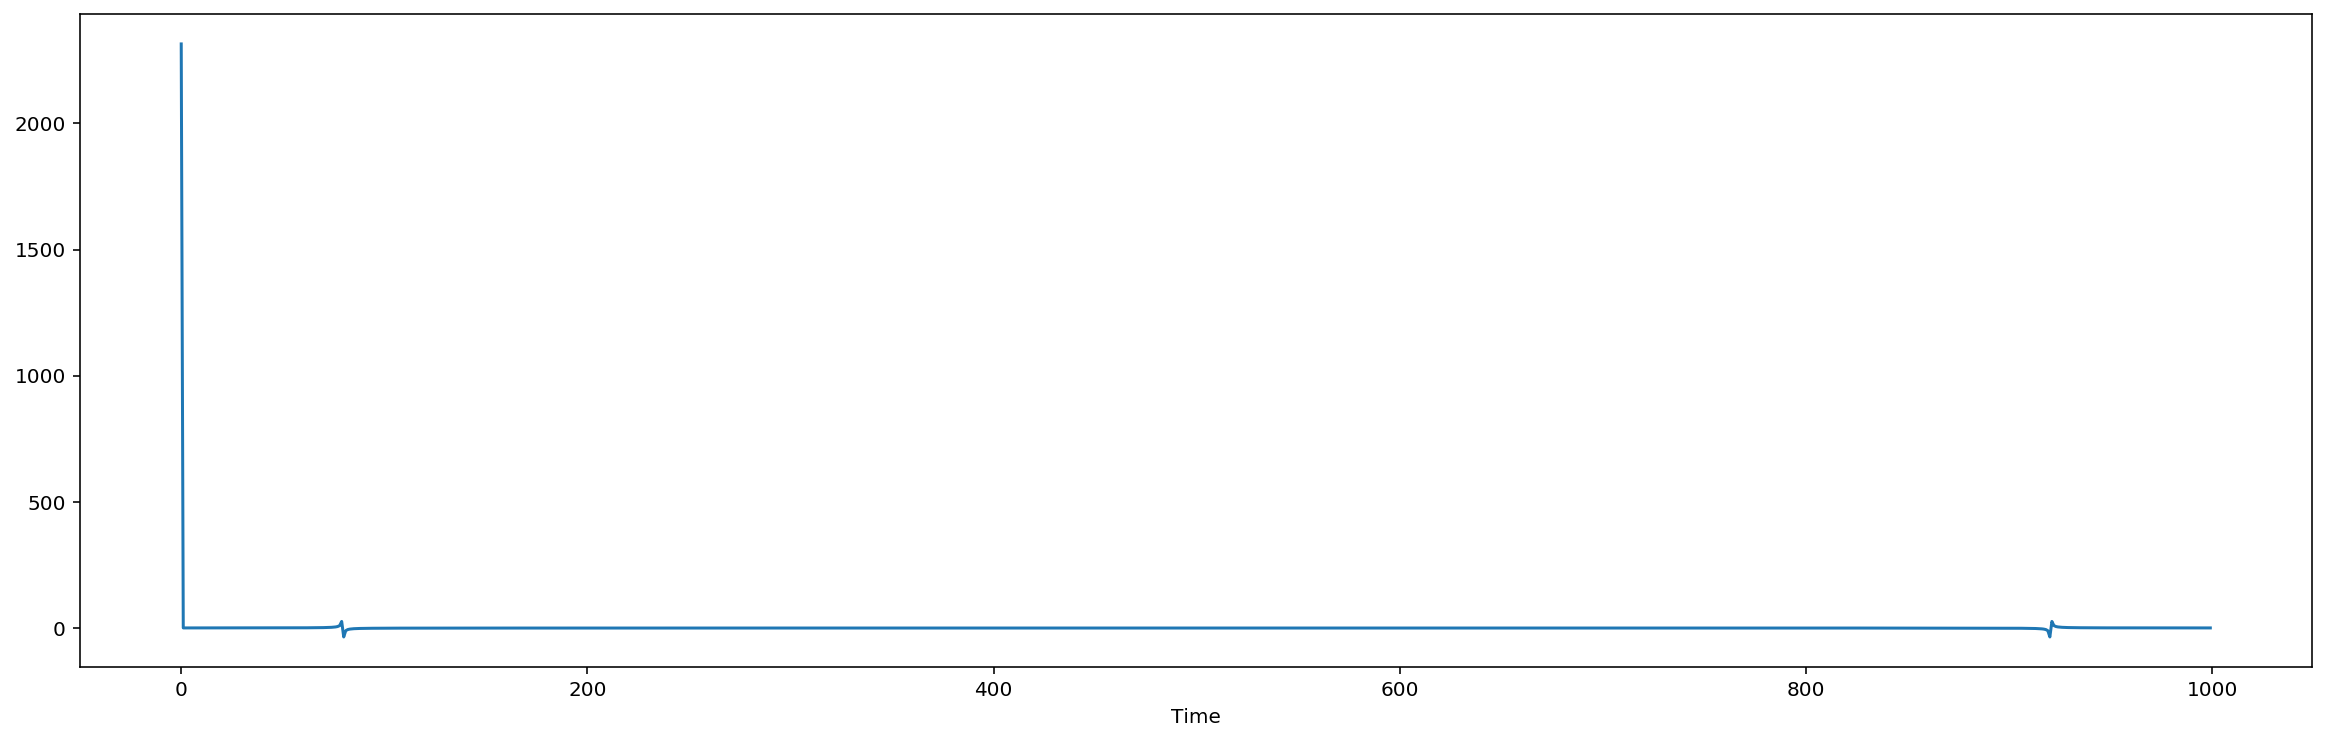

In [924]:
DFT2 = np.fft.fft(rr)
real_DFT2=DFT2.real
plt.figure(figsize=(20,6))
plt.plot(time,real_DFT2)
plt.xlabel('Time')

In [1021]:
add_decomp2 = seasonal_decompose(x=rr, model='additive',period=400)

Text(0.5, 0, 'Time')

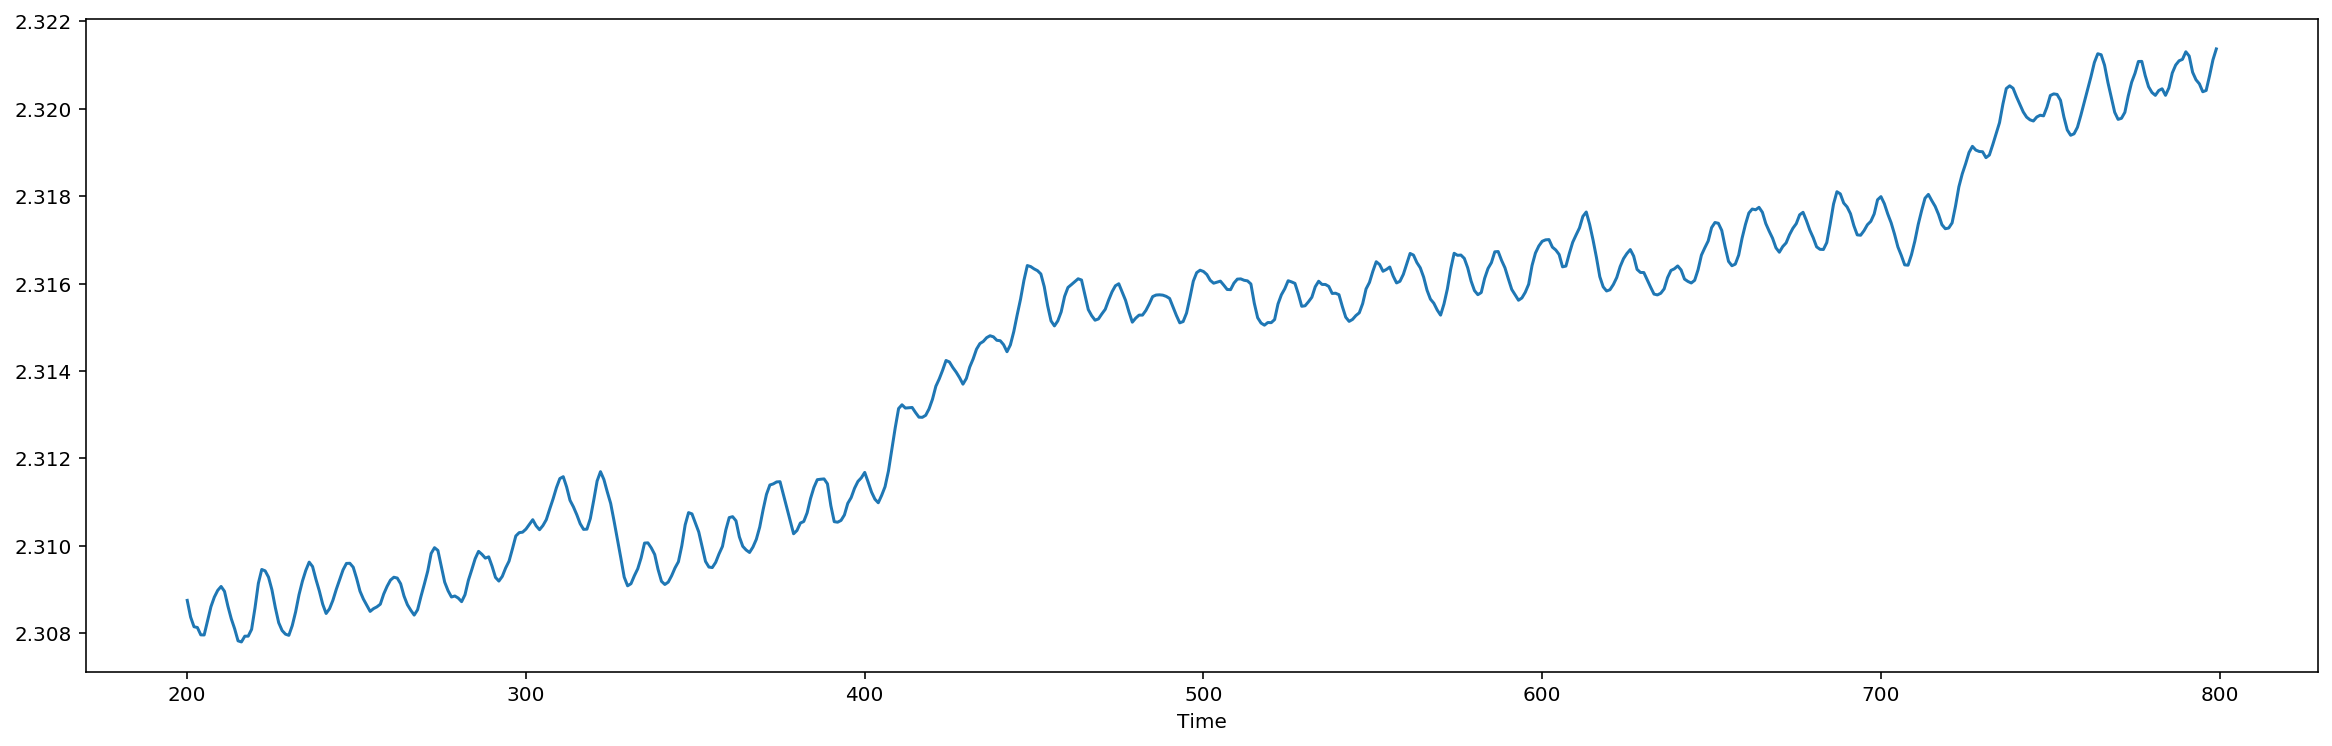

In [1022]:
plt.figure(figsize=(20,6))
plt.plot(time,add_decomp2.trend)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

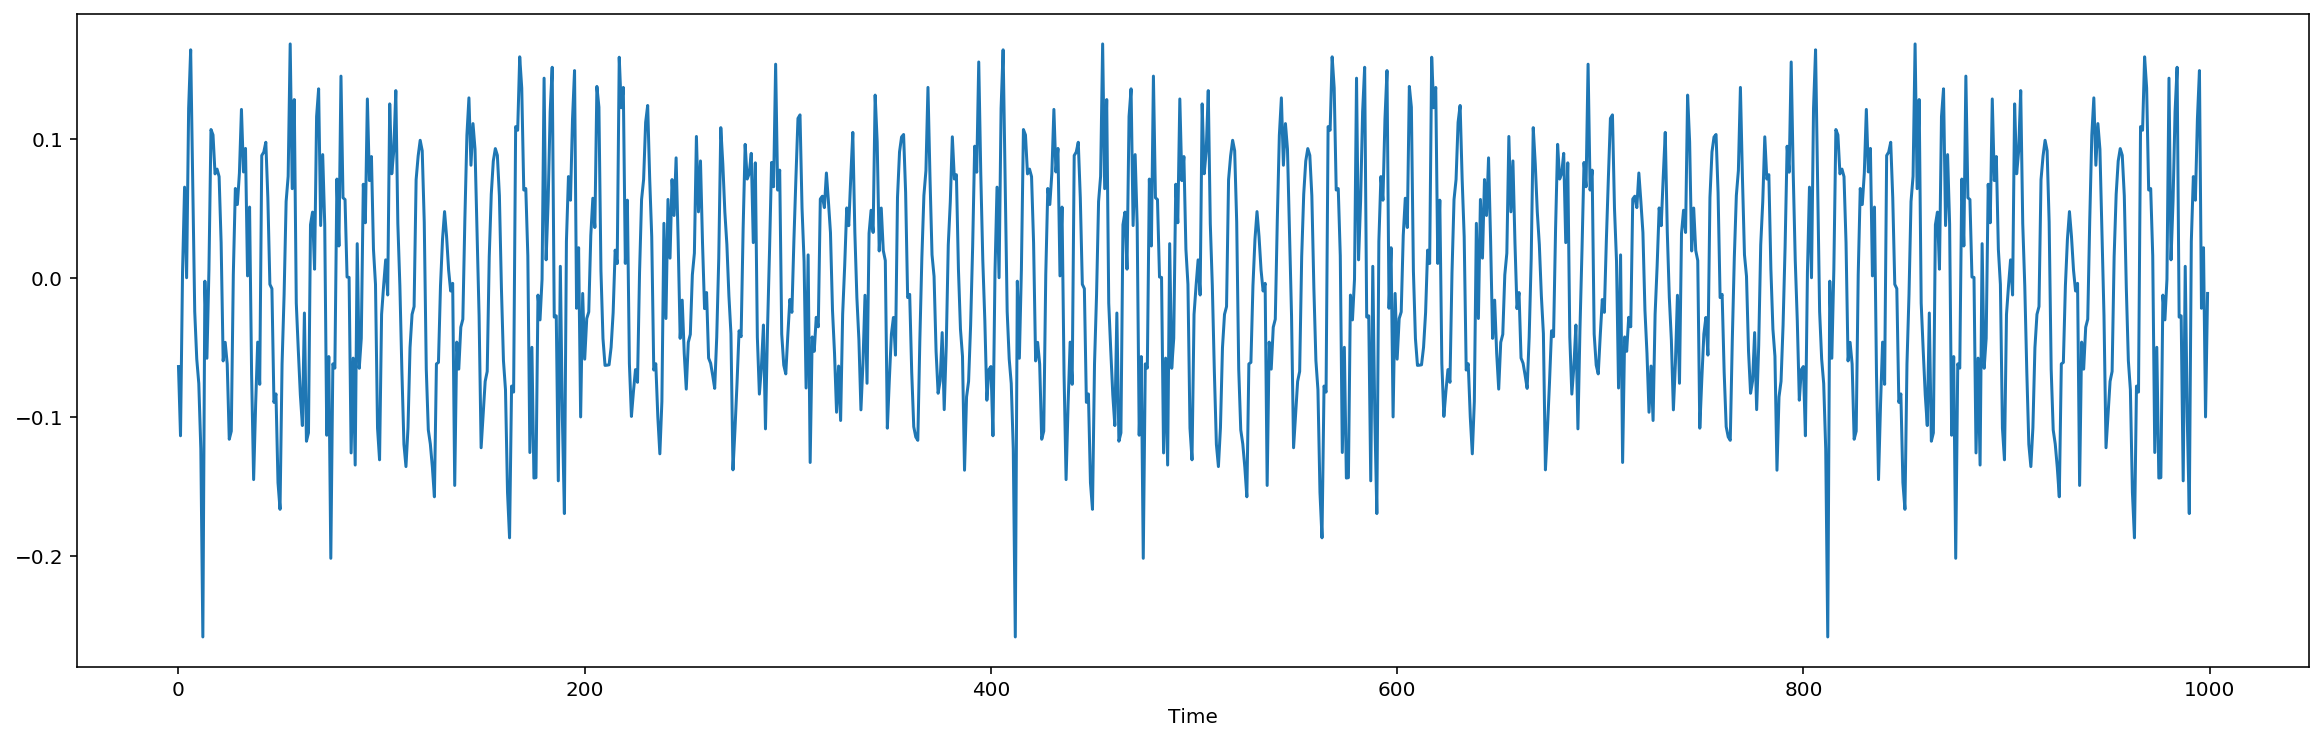

In [1023]:
plt.figure(figsize=(20,6))
plt.plot(time, add_decomp2.seasonal)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

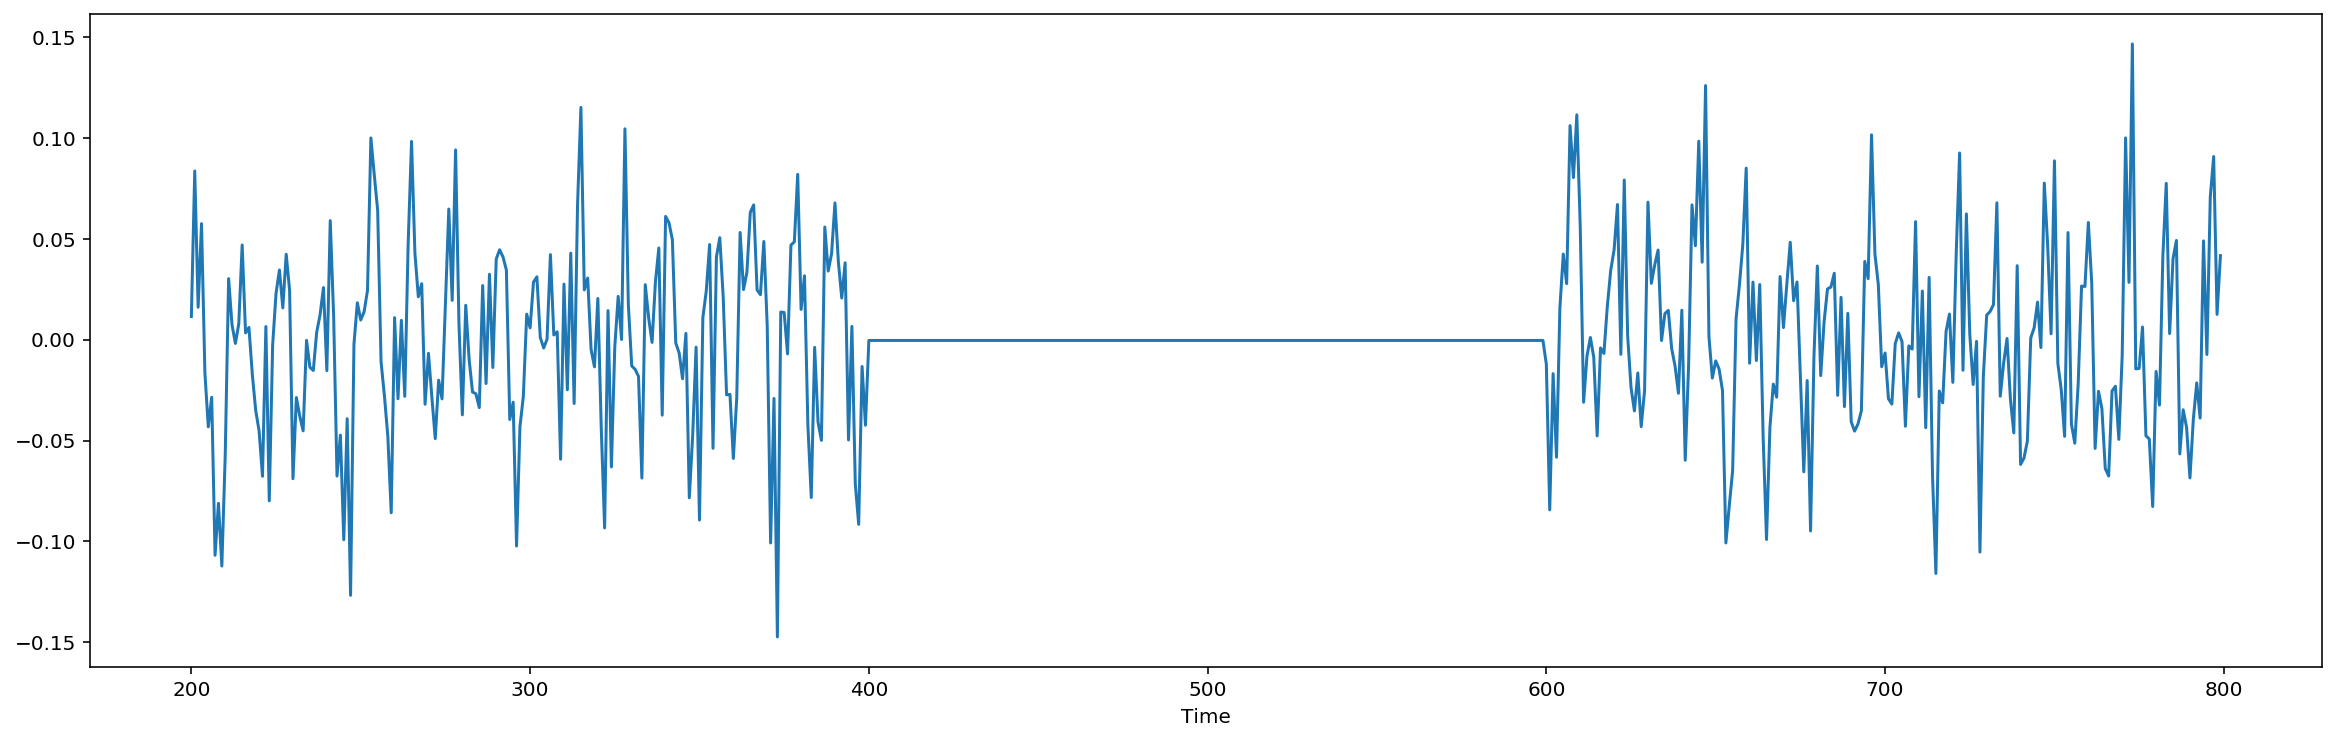

In [1024]:
plt.figure(figsize=(20,6))
plt.plot(time, add_decomp2.resid)
plt.xlabel('Time')